In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

In [2]:
# List of dataset file paths and labels
datasets = [
    ('../data/internal/networks/all_members_14days.gml', 'All_members_14days'),
    ('../data/internal/networks/all_members_7days.gml', 'All_members_7days'),
    ('../data/internal/networks/all_members_1day.gml', 'All_members_1day'),
    ('../data/internal/networks/democrat_members_14days.gml', 'Democrat_members_14days'),
    ('../data/internal/networks/democrat_members_7days.gml', 'Democrat_members_7days'),
    ('../data/internal/networks/democrat_members_1day.gml', 'Democrat_members_1day'),
    ('../data/internal/networks/representatives_14days.gml', 'Representatives_14days'),
    ('../data/internal/networks/representatives_7days.gml', 'Representatives_7days'),
    ('../data/internal/networks/representatives_1day.gml', 'Representatives_1day'),
    ('../data/internal/networks/republican_members_14days.gml', 'Republican_members_14days'),
    ('../data/internal/networks/republican_members_7days.gml', 'Republican_members_7days'),
    ('../data/internal/networks/republican_members_1day.gml', 'Republican_members_1days'),
    ('../data/internal/networks/senators_14days.gml', 'Senators_14days'),
    ('../data/internal/networks/senators_7days.gml', 'Senators_7days'),
    ('../data/internal/networks/senators_1day.gml', 'Senators_1day')

]

### Centralities

In [3]:
# Function to calculate centralities
def calculate_centralities(G):
    degree_dic = nx.degree_centrality(G)
    betwns_dic = nx.betweenness_centrality(G)
    closen_dic = nx.closeness_centrality(G)
    eigenv_dic = nx.eigenvector_centrality(G)

     
    degree = list(degree_dic.values())
    betwns = list(betwns_dic.values())
    closen = list(closen_dic.values())
    eigenv = list(eigenv_dic.values())
    
    return degree, betwns, closen, eigenv, degree_dic, betwns_dic, closen_dic, eigenv_dic

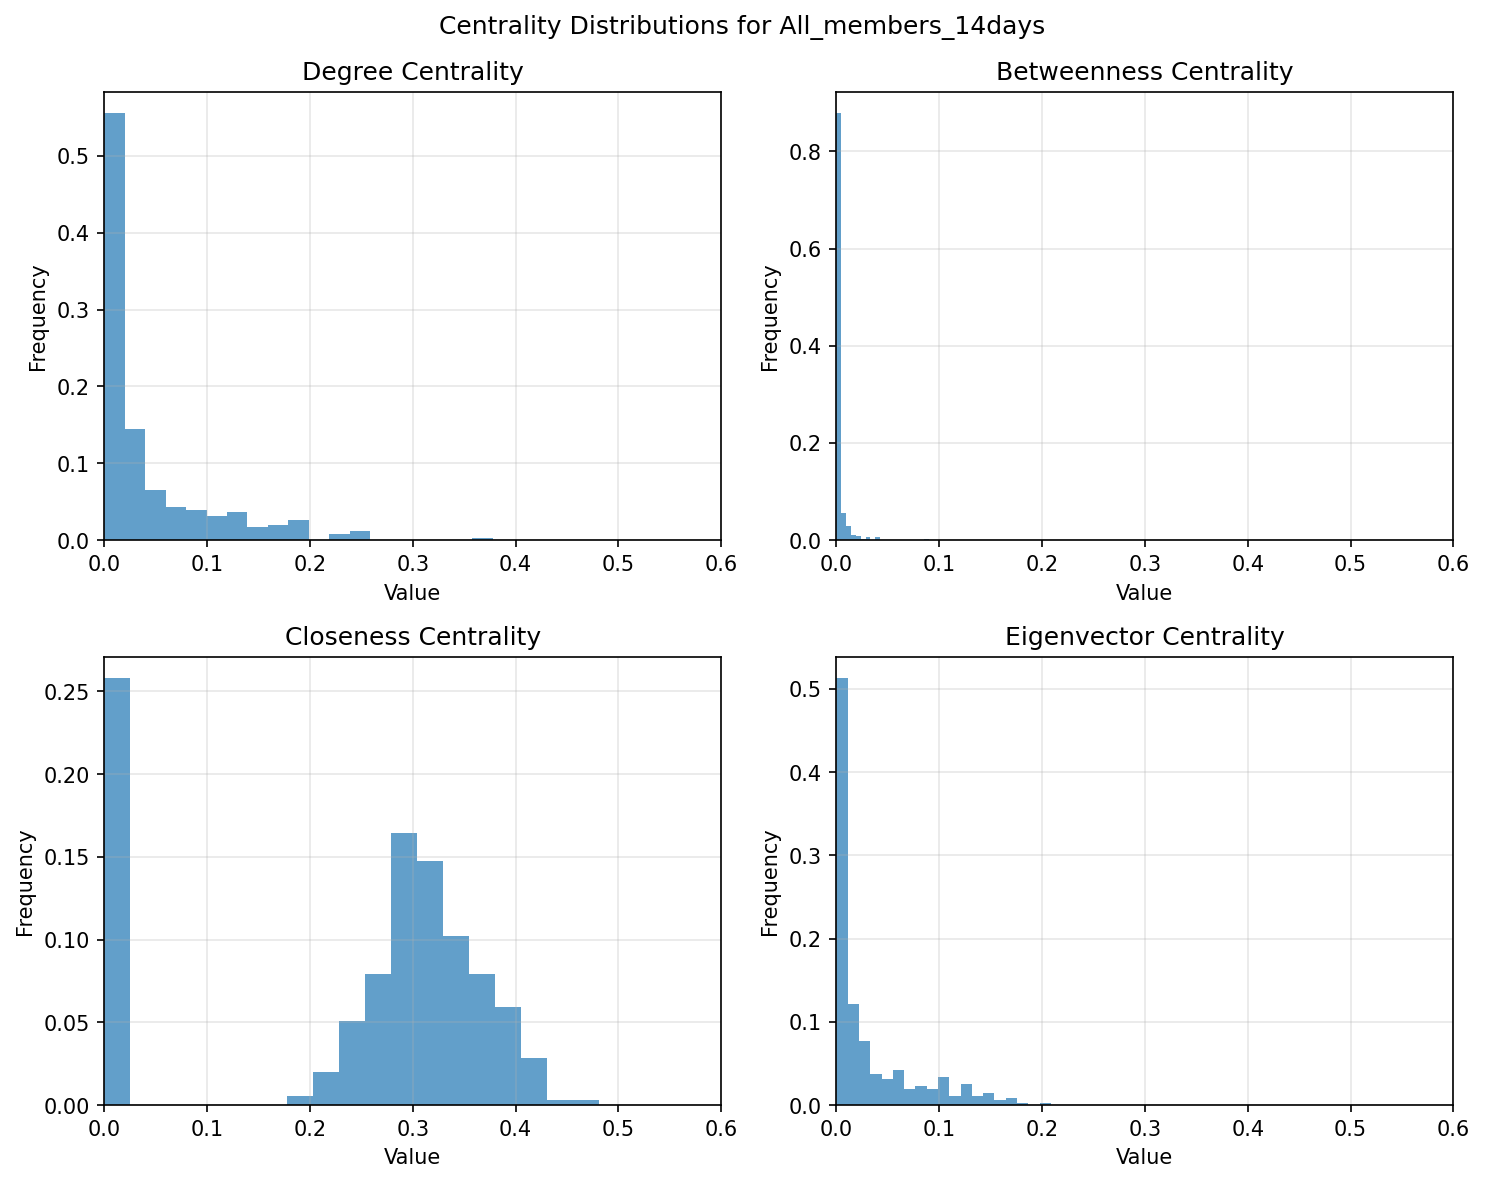

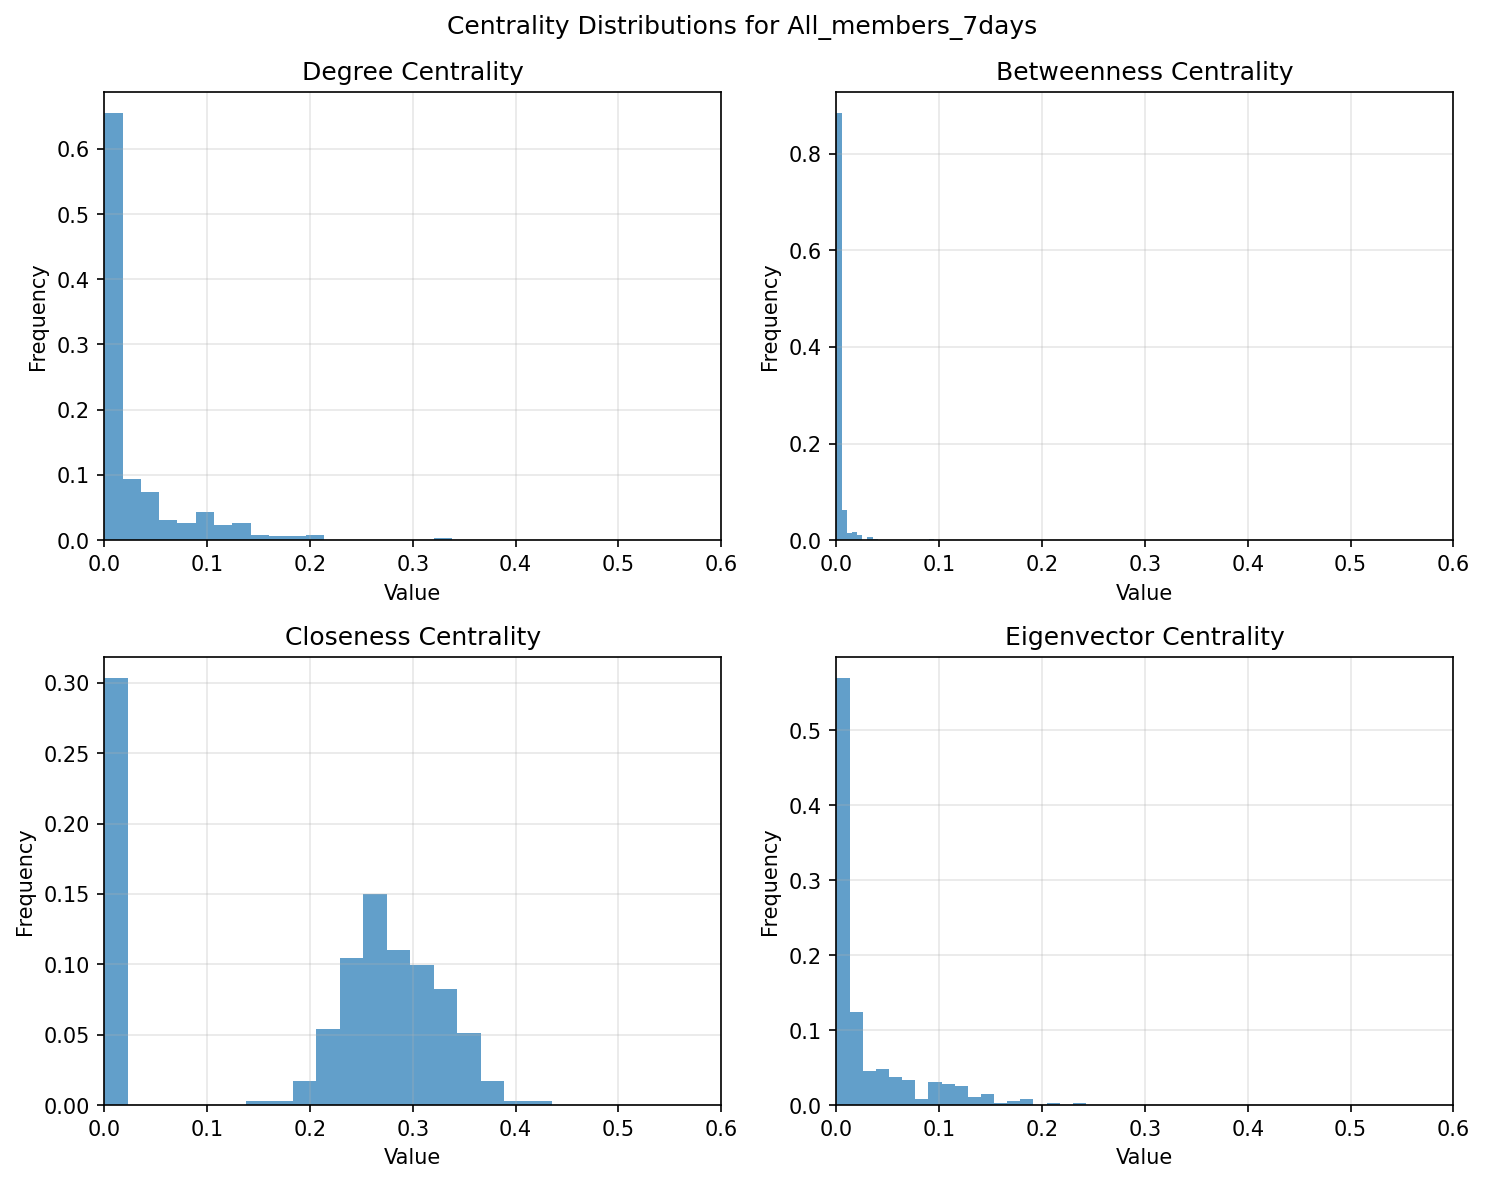

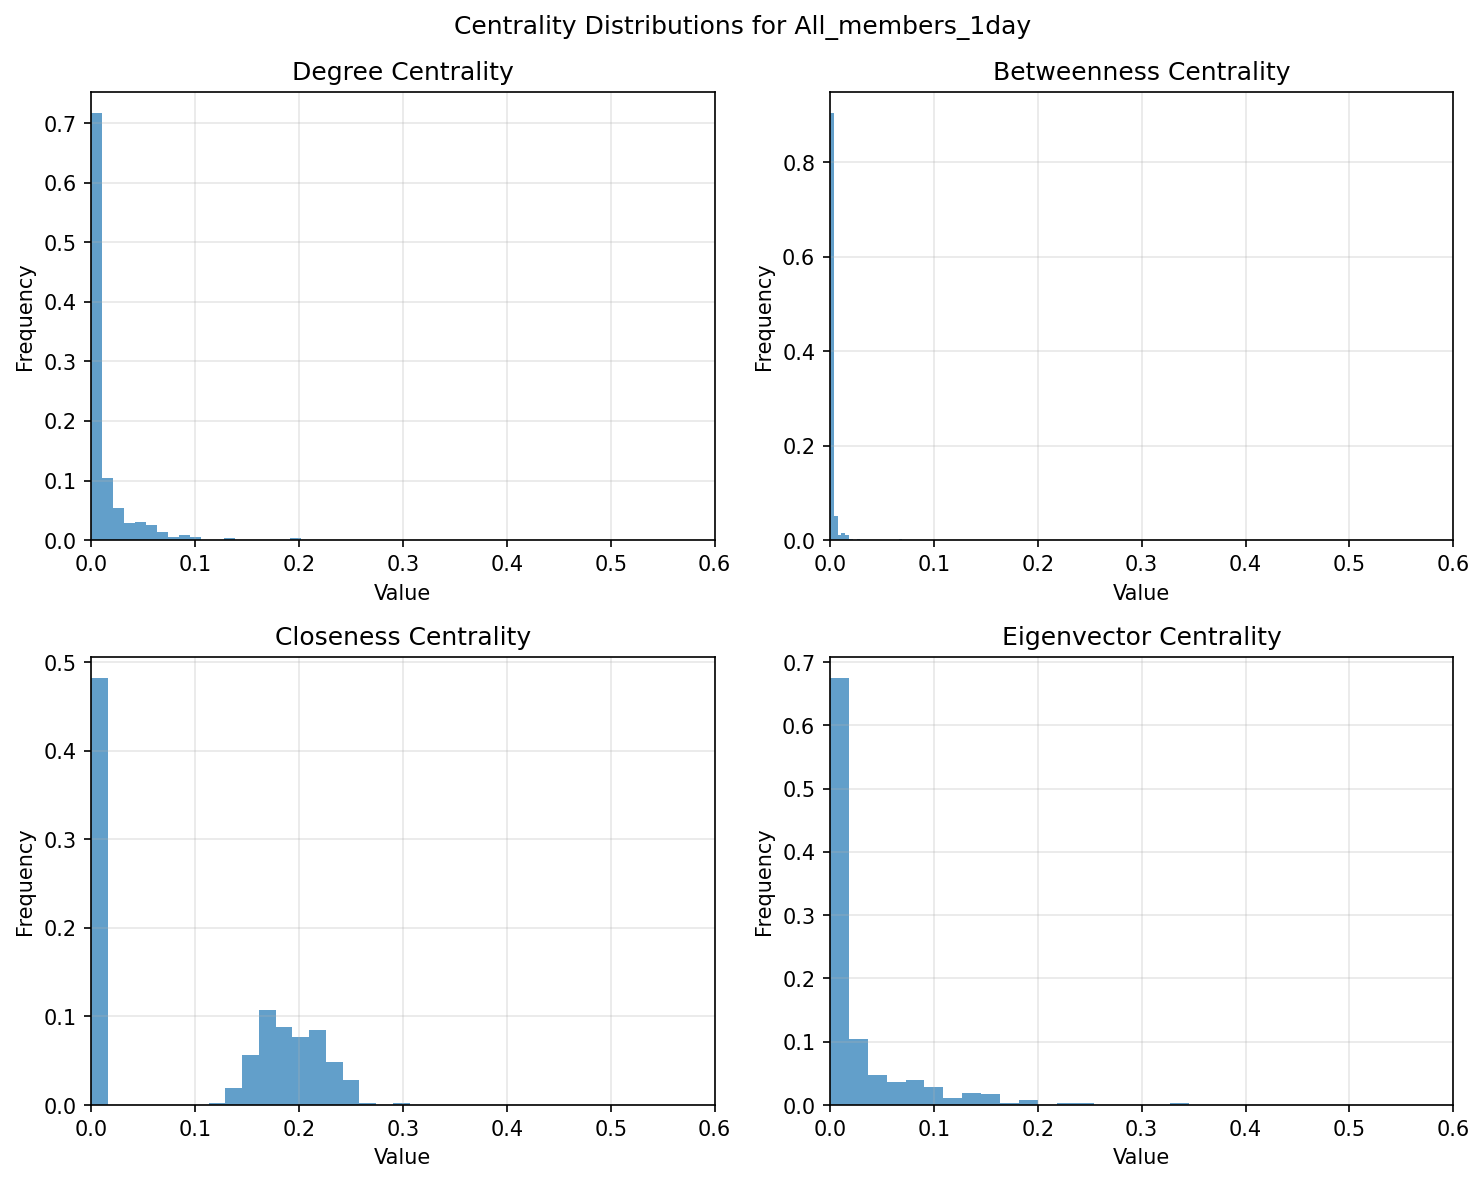

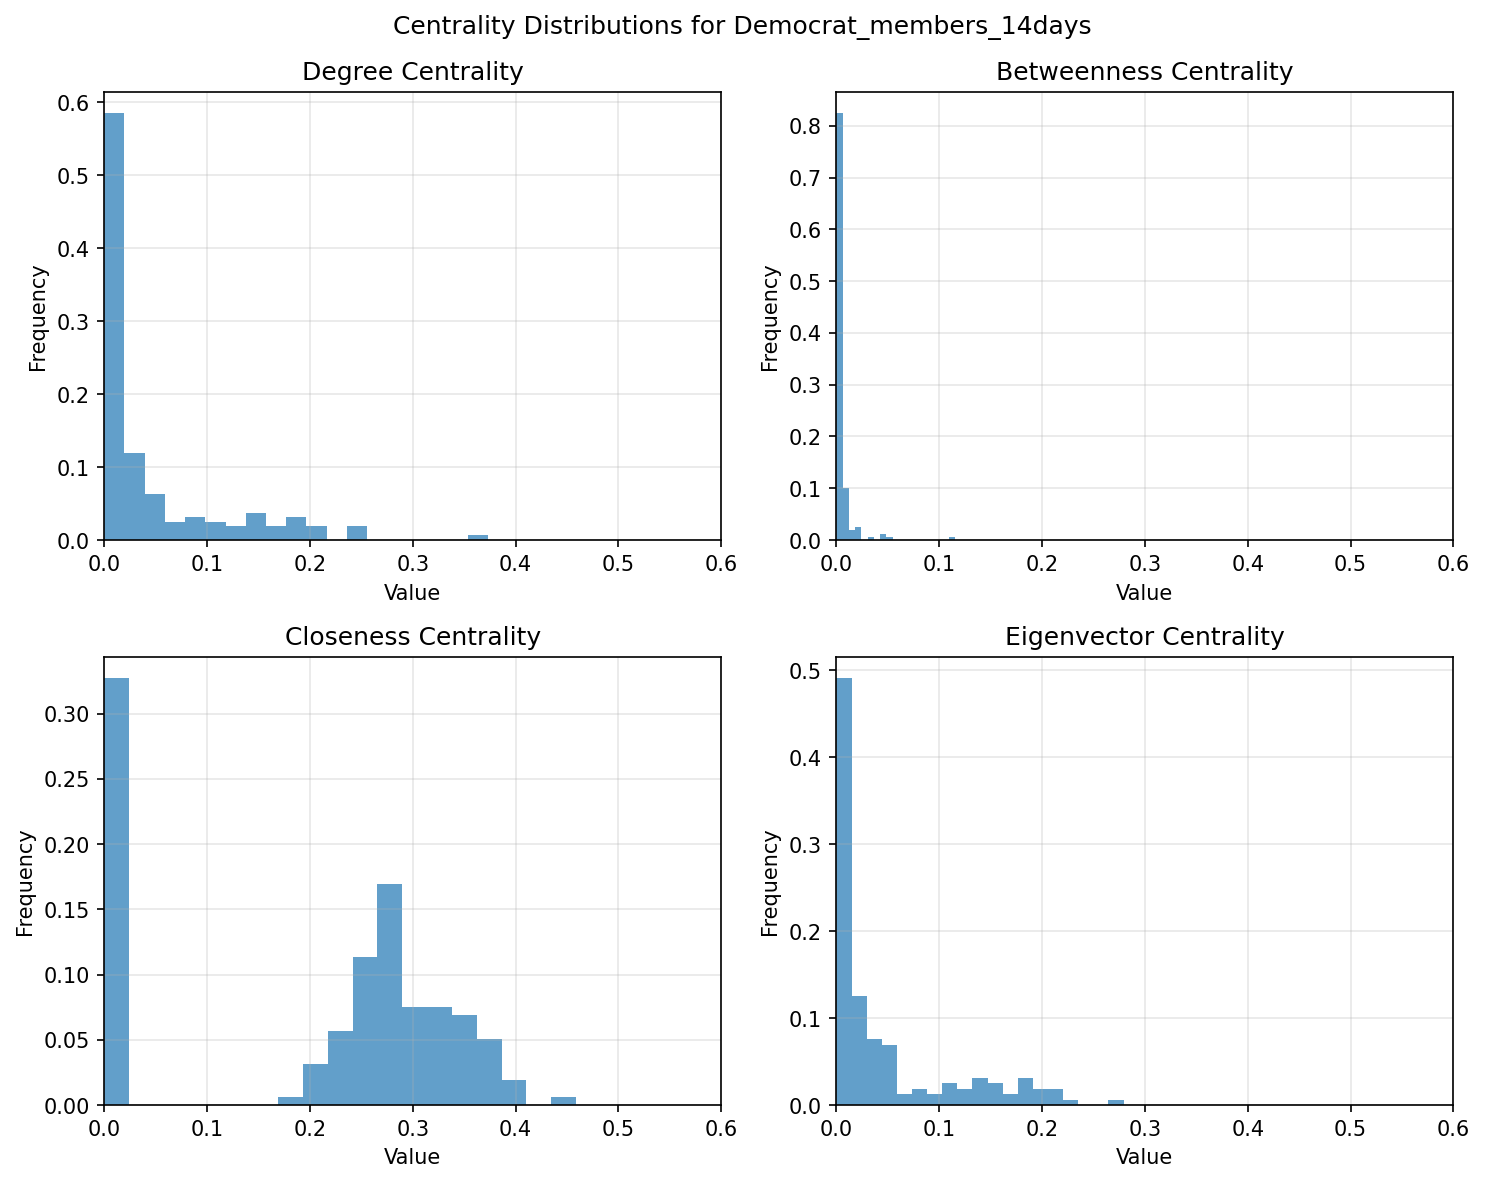

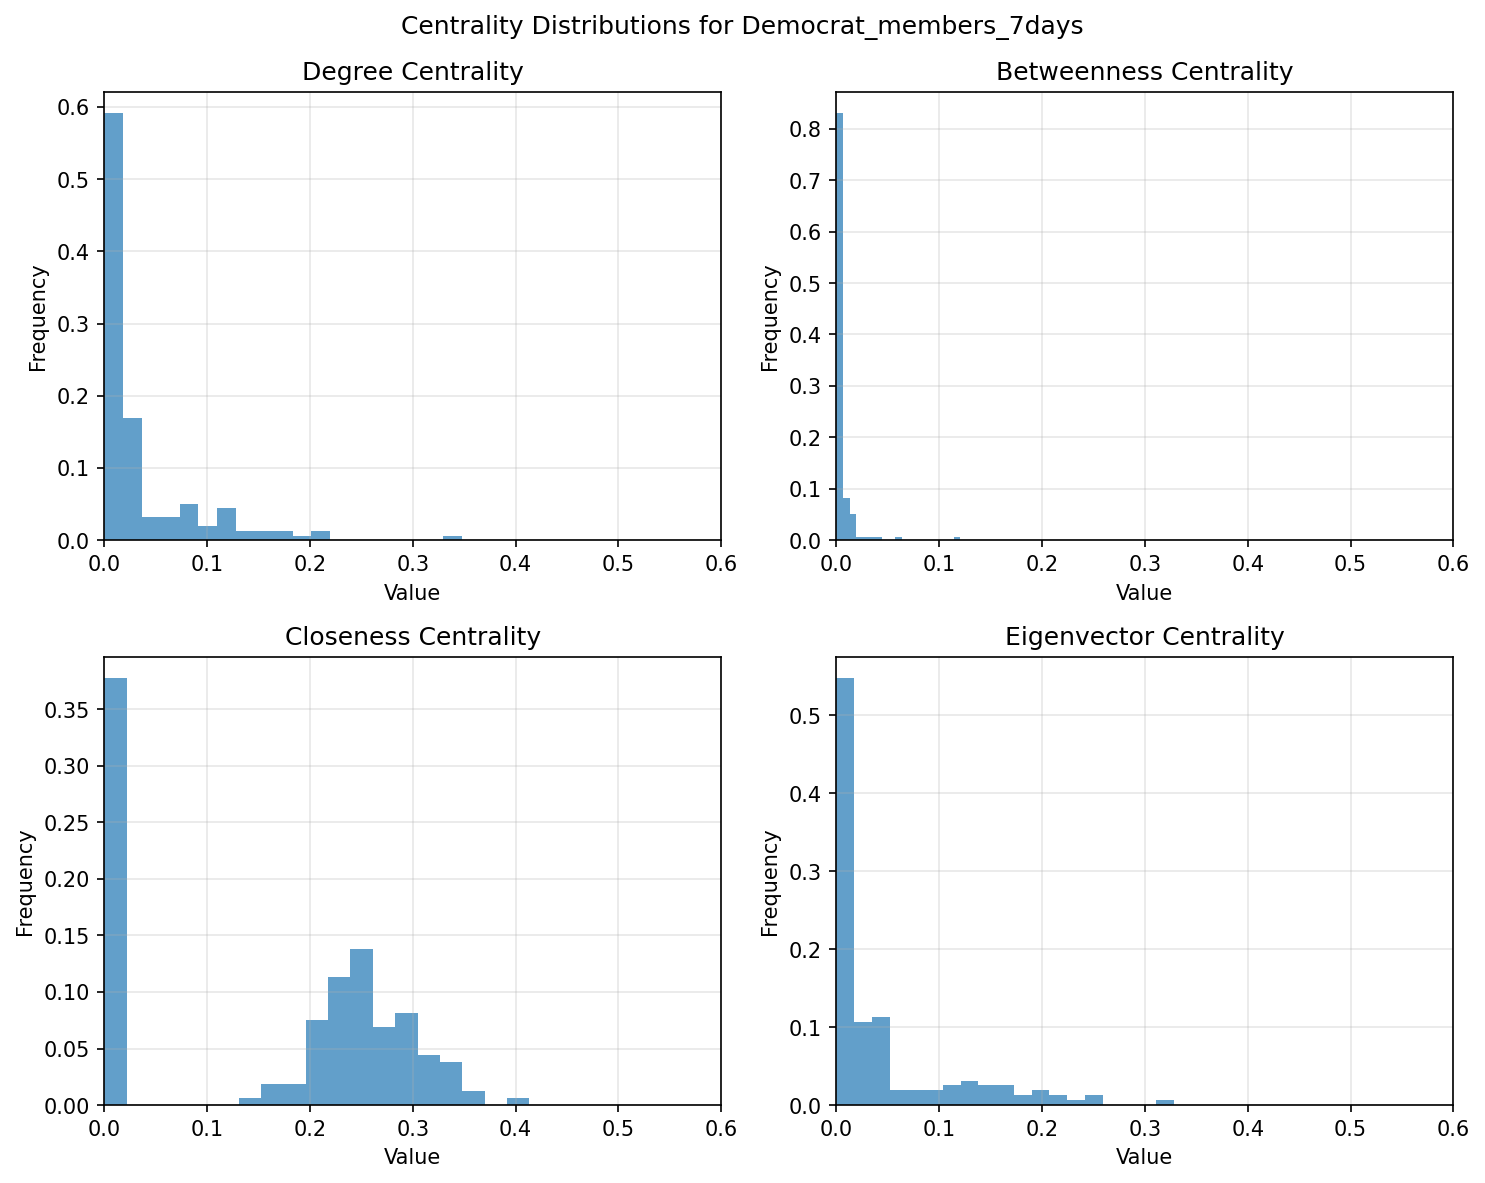

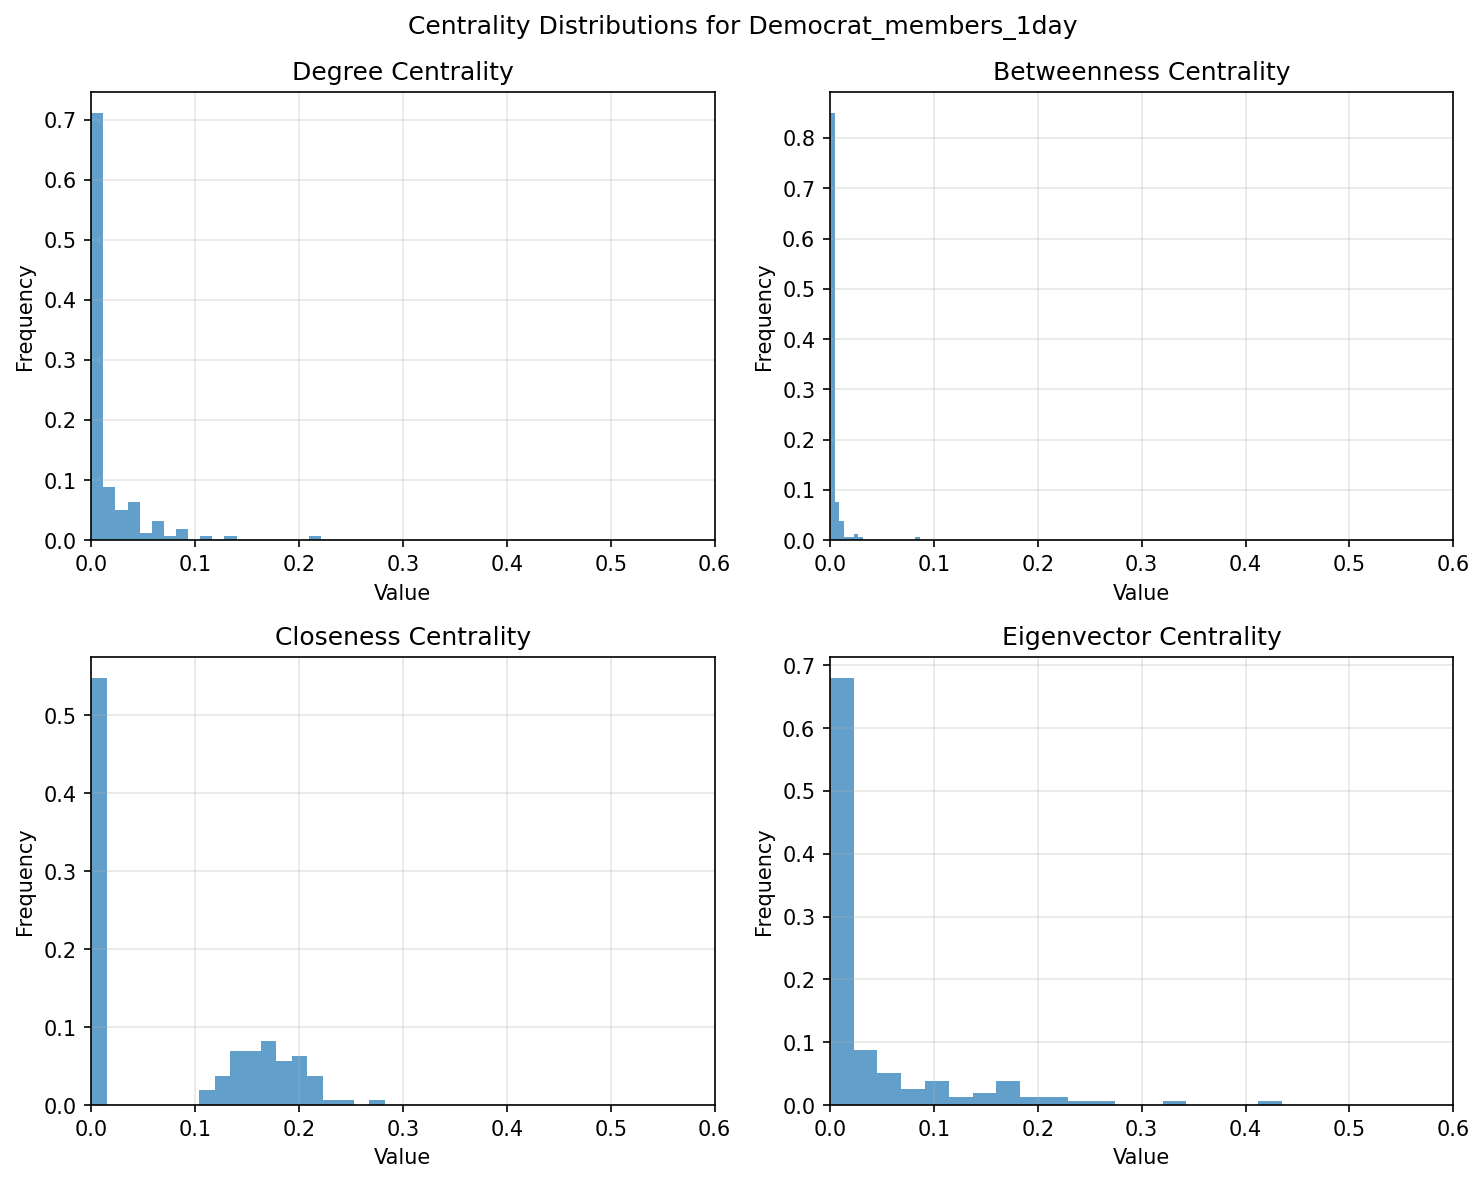

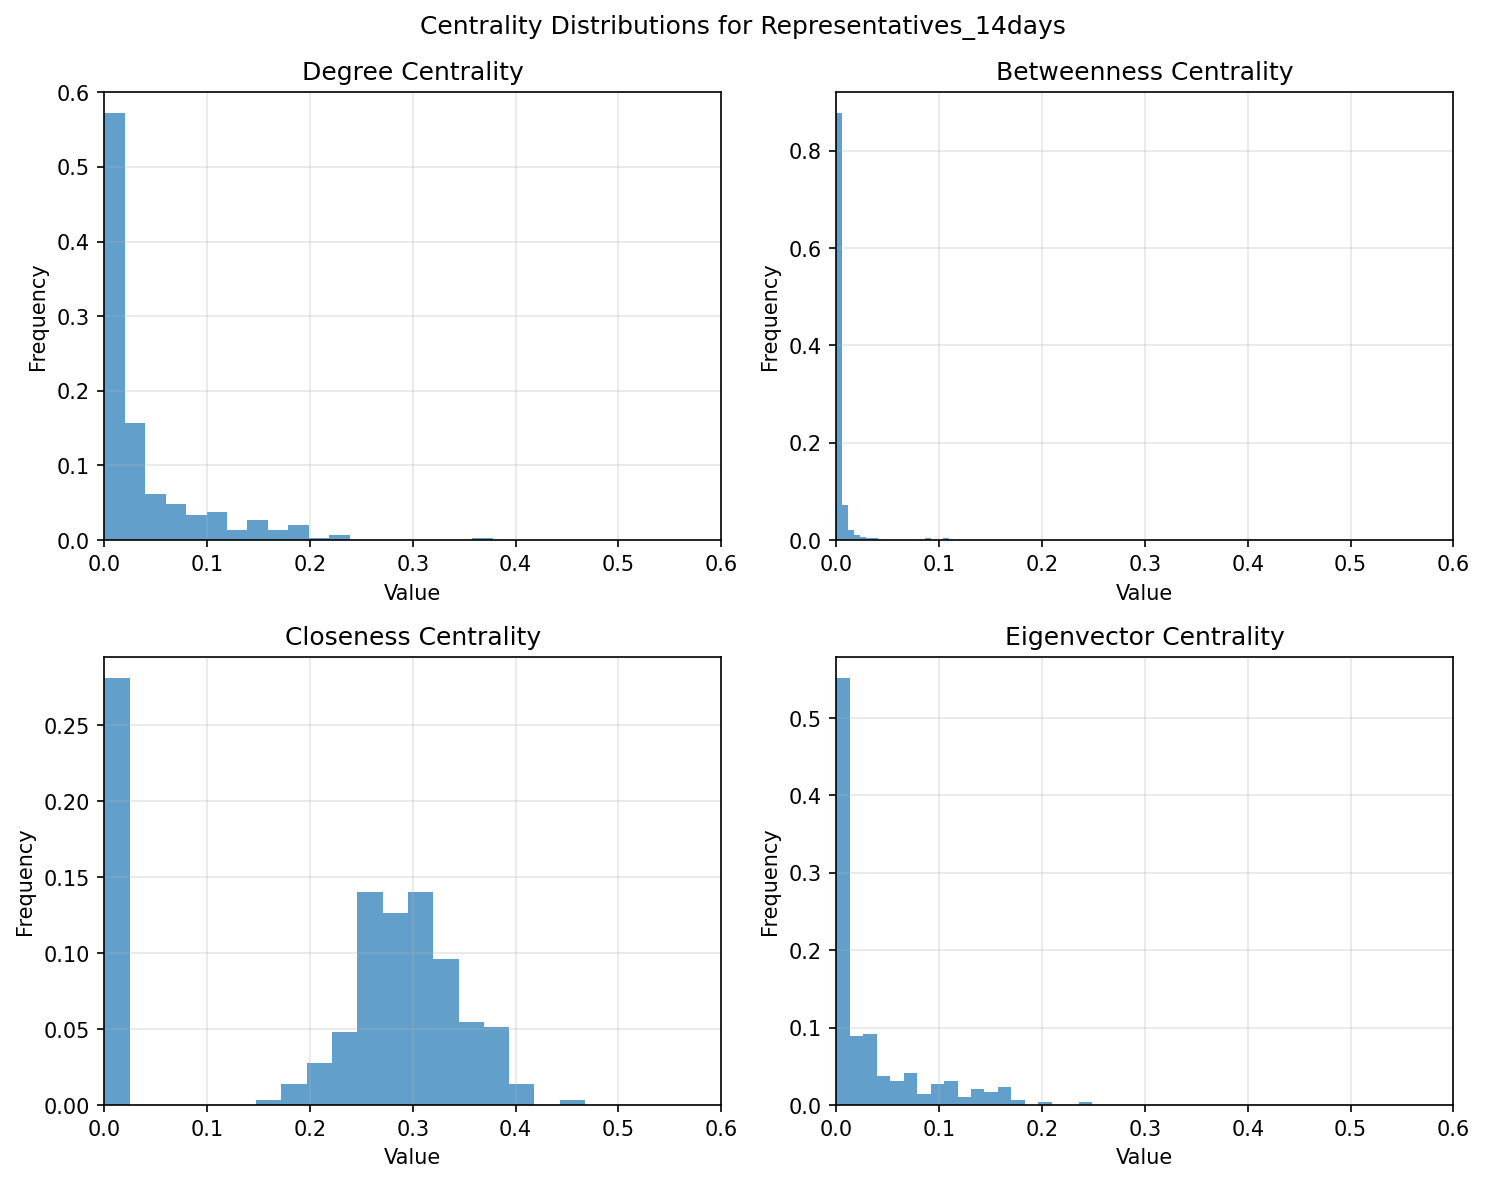

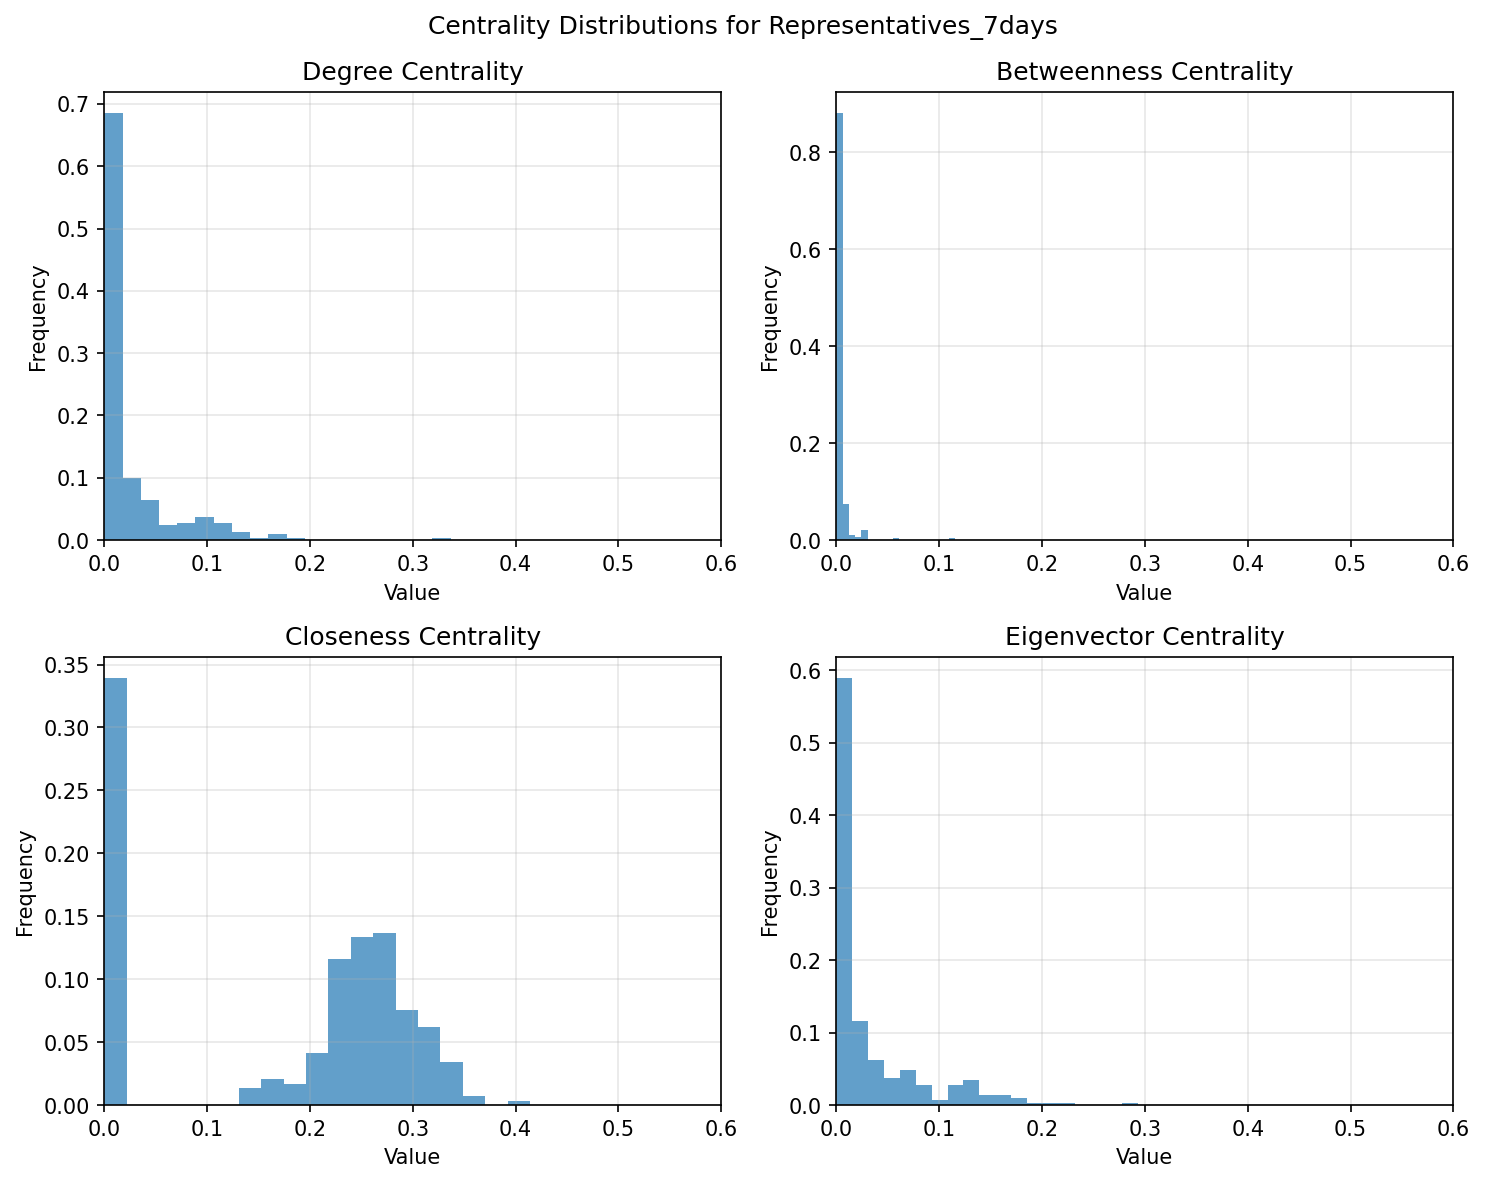

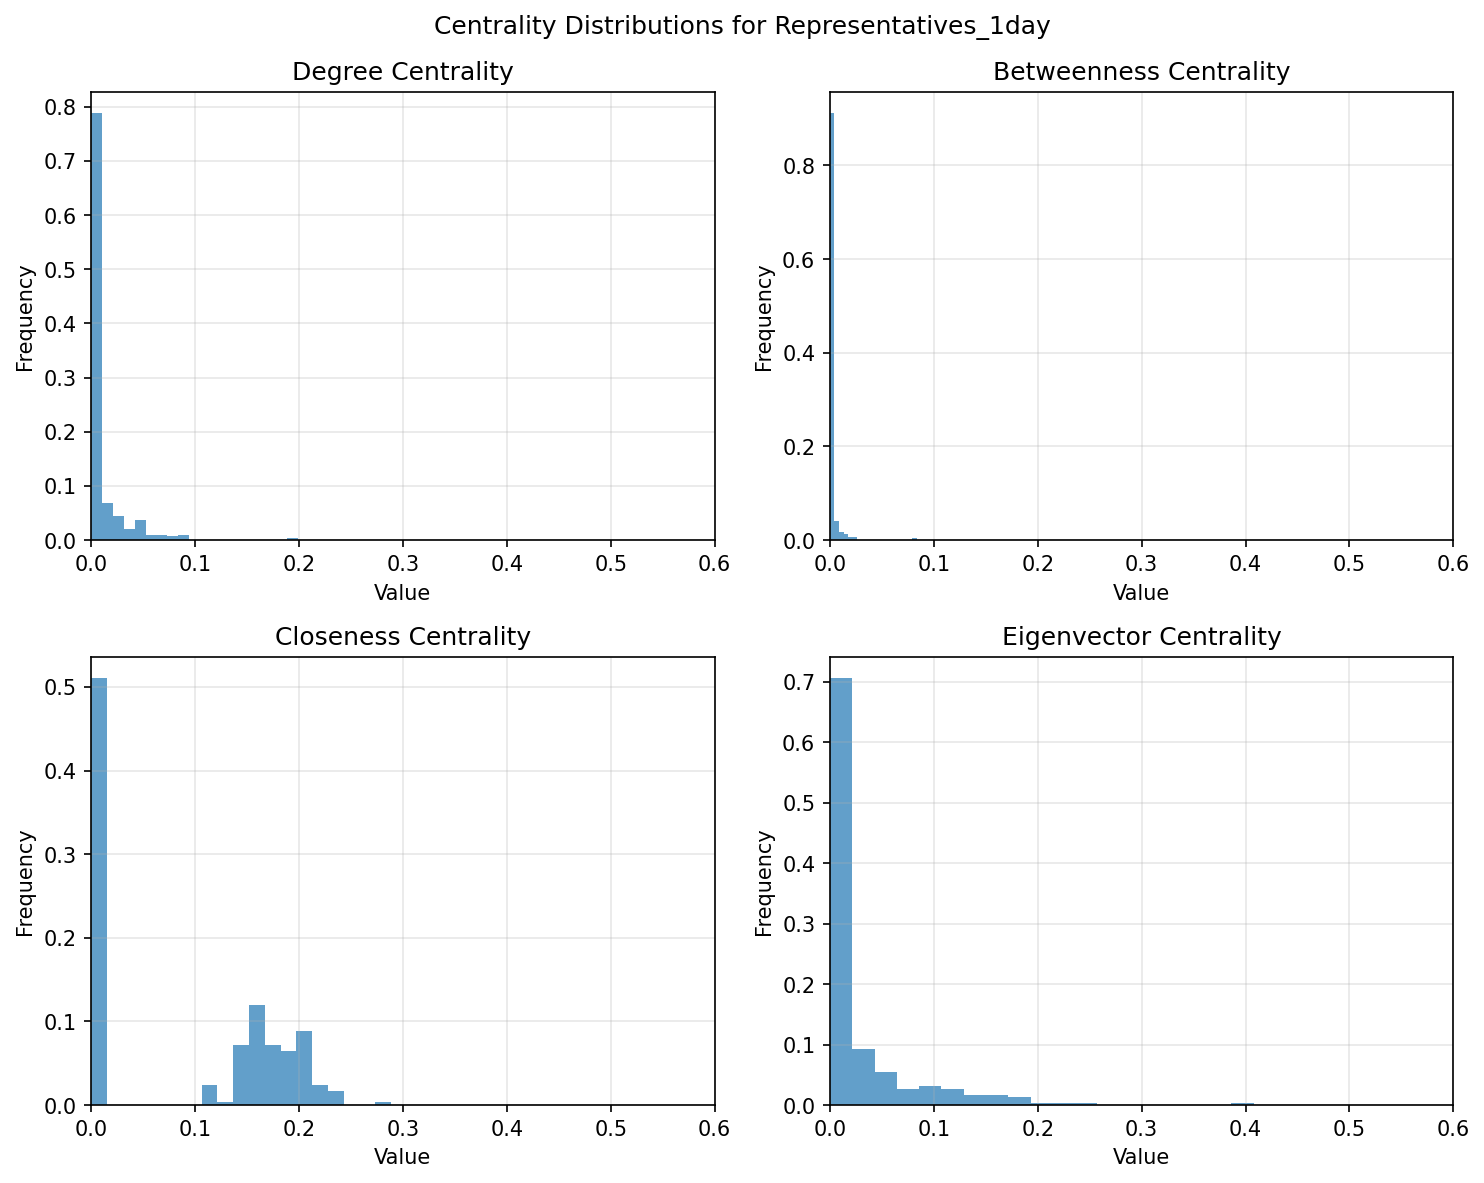

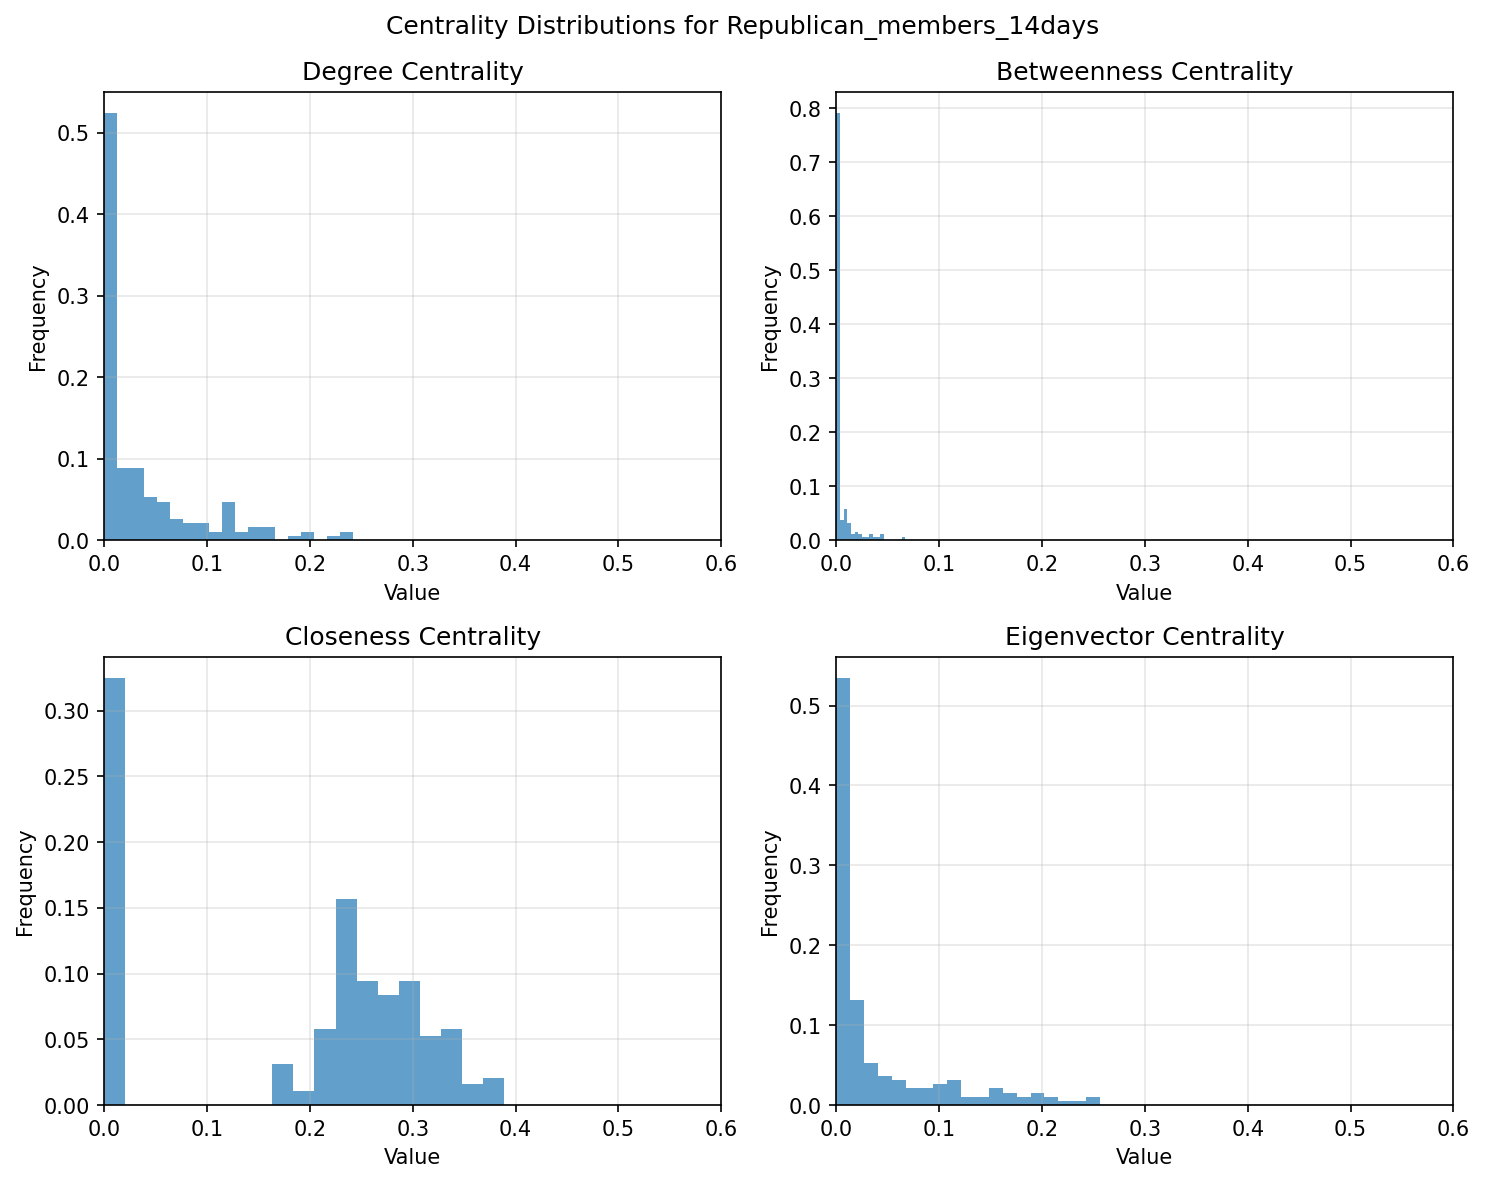

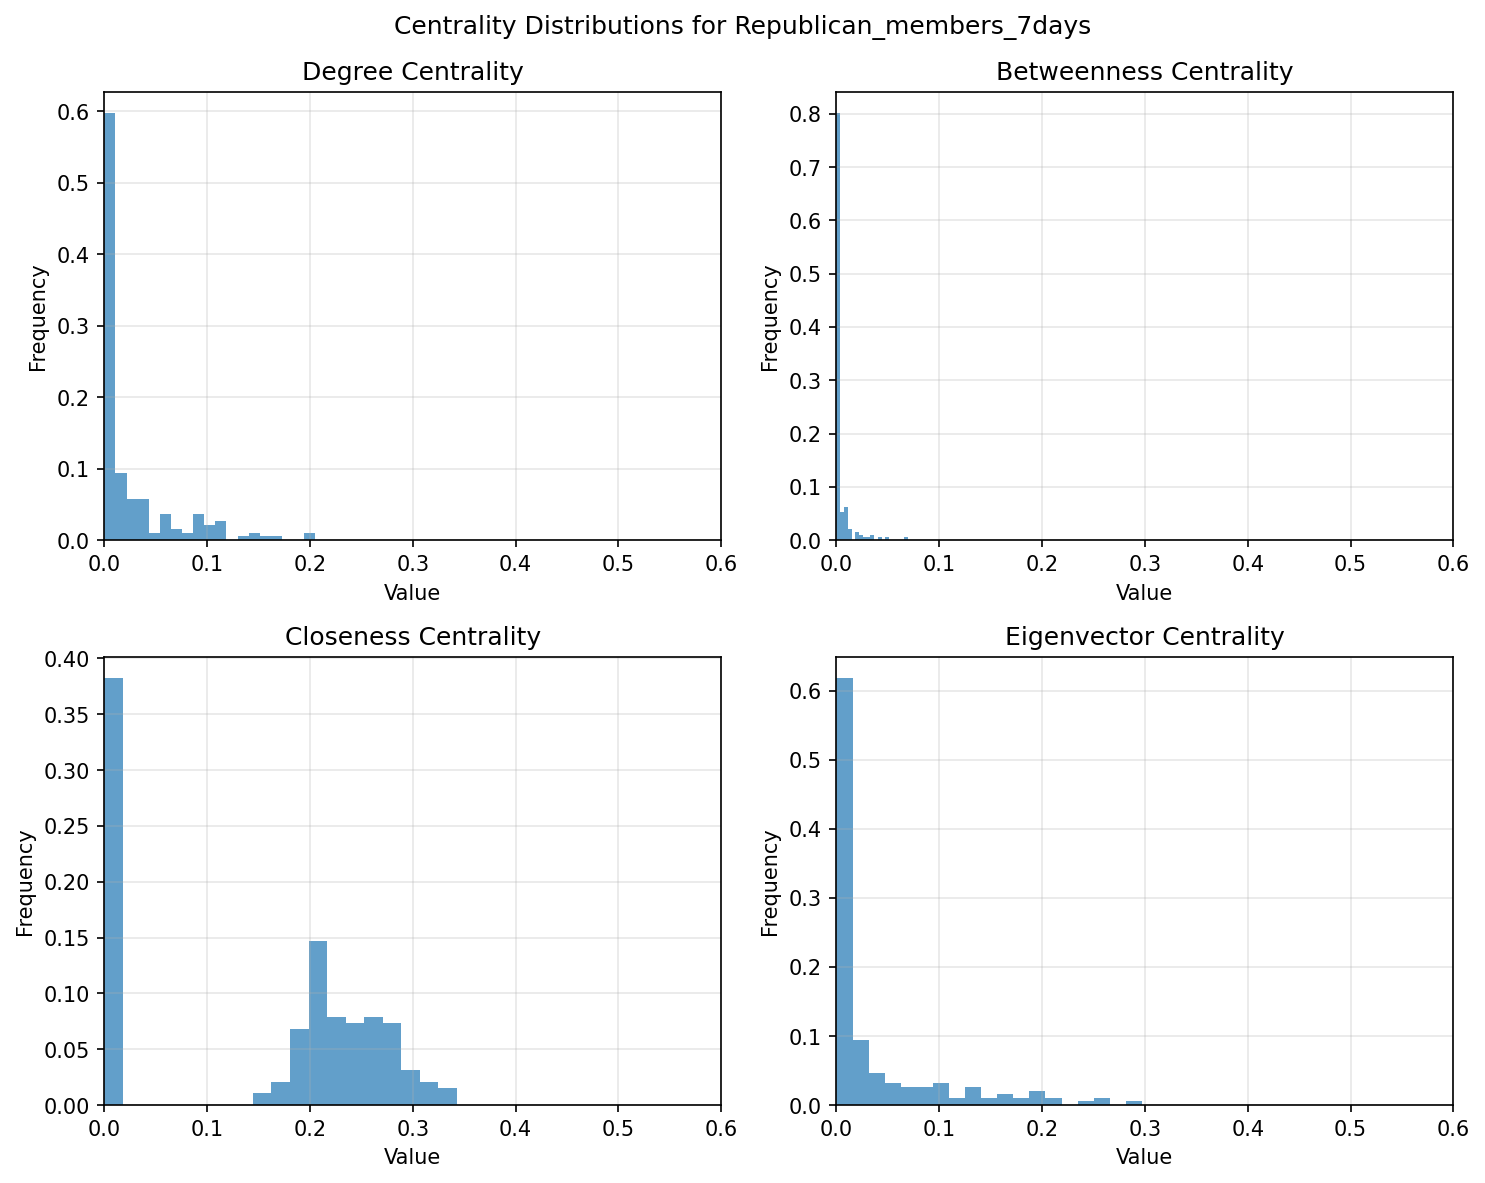

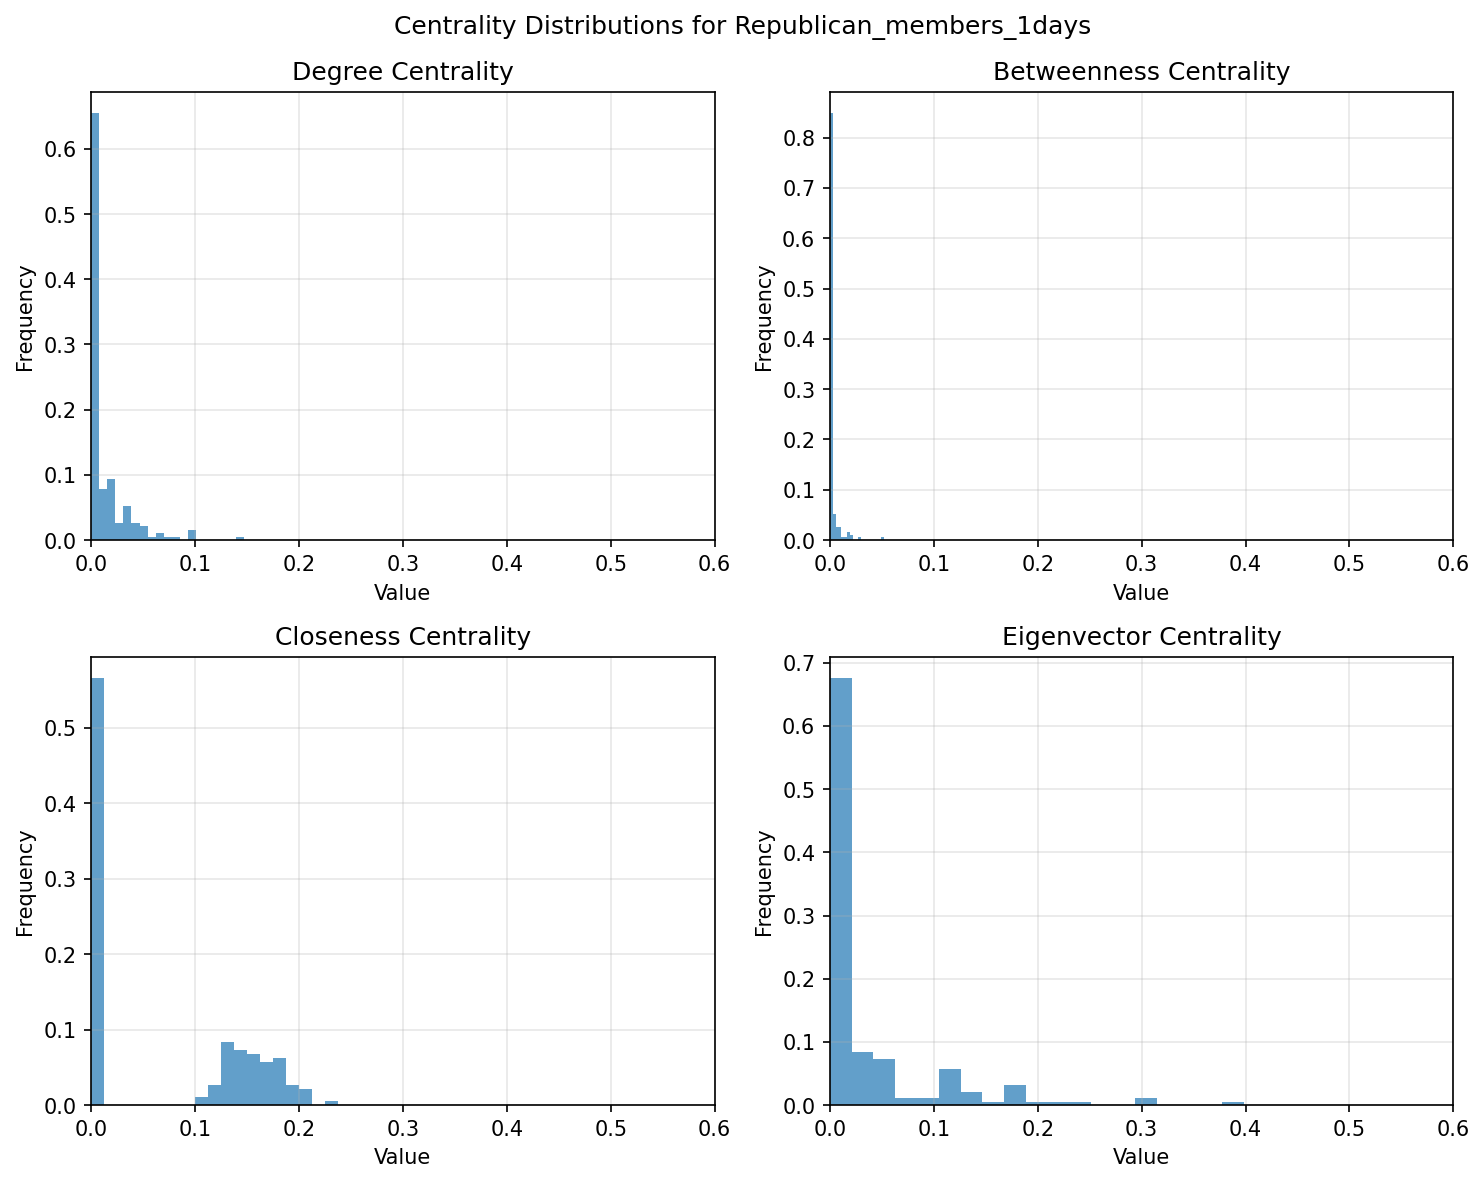

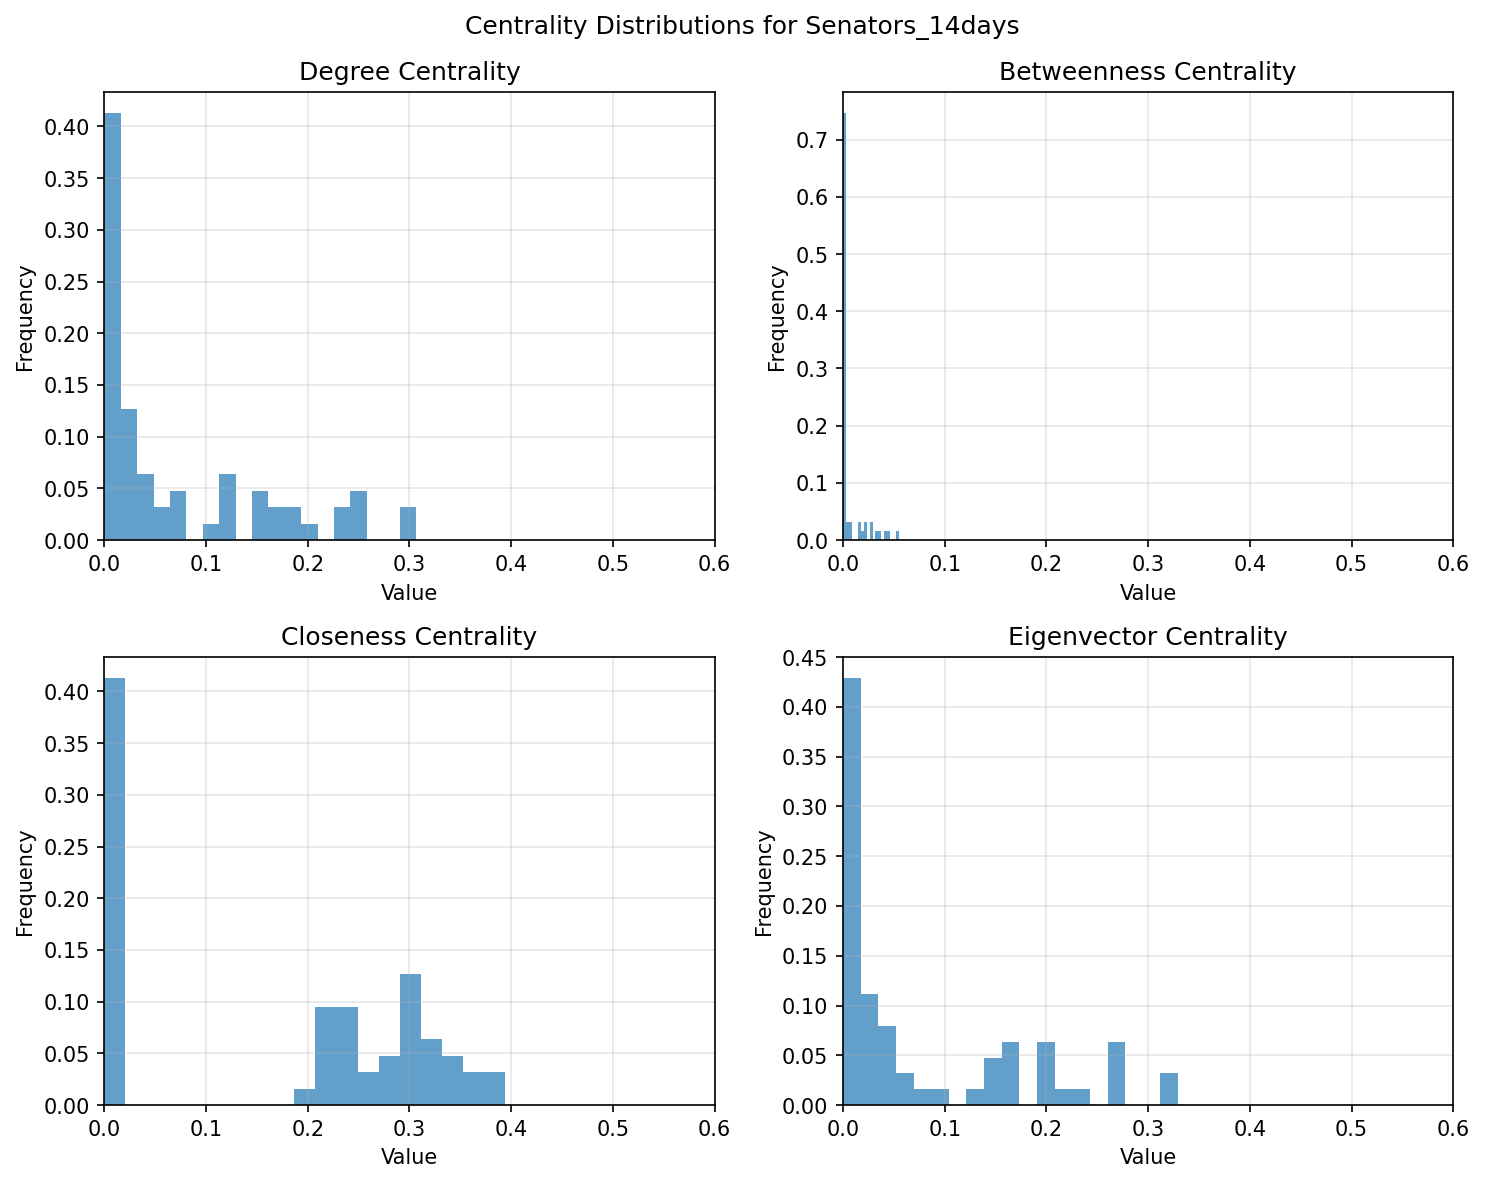

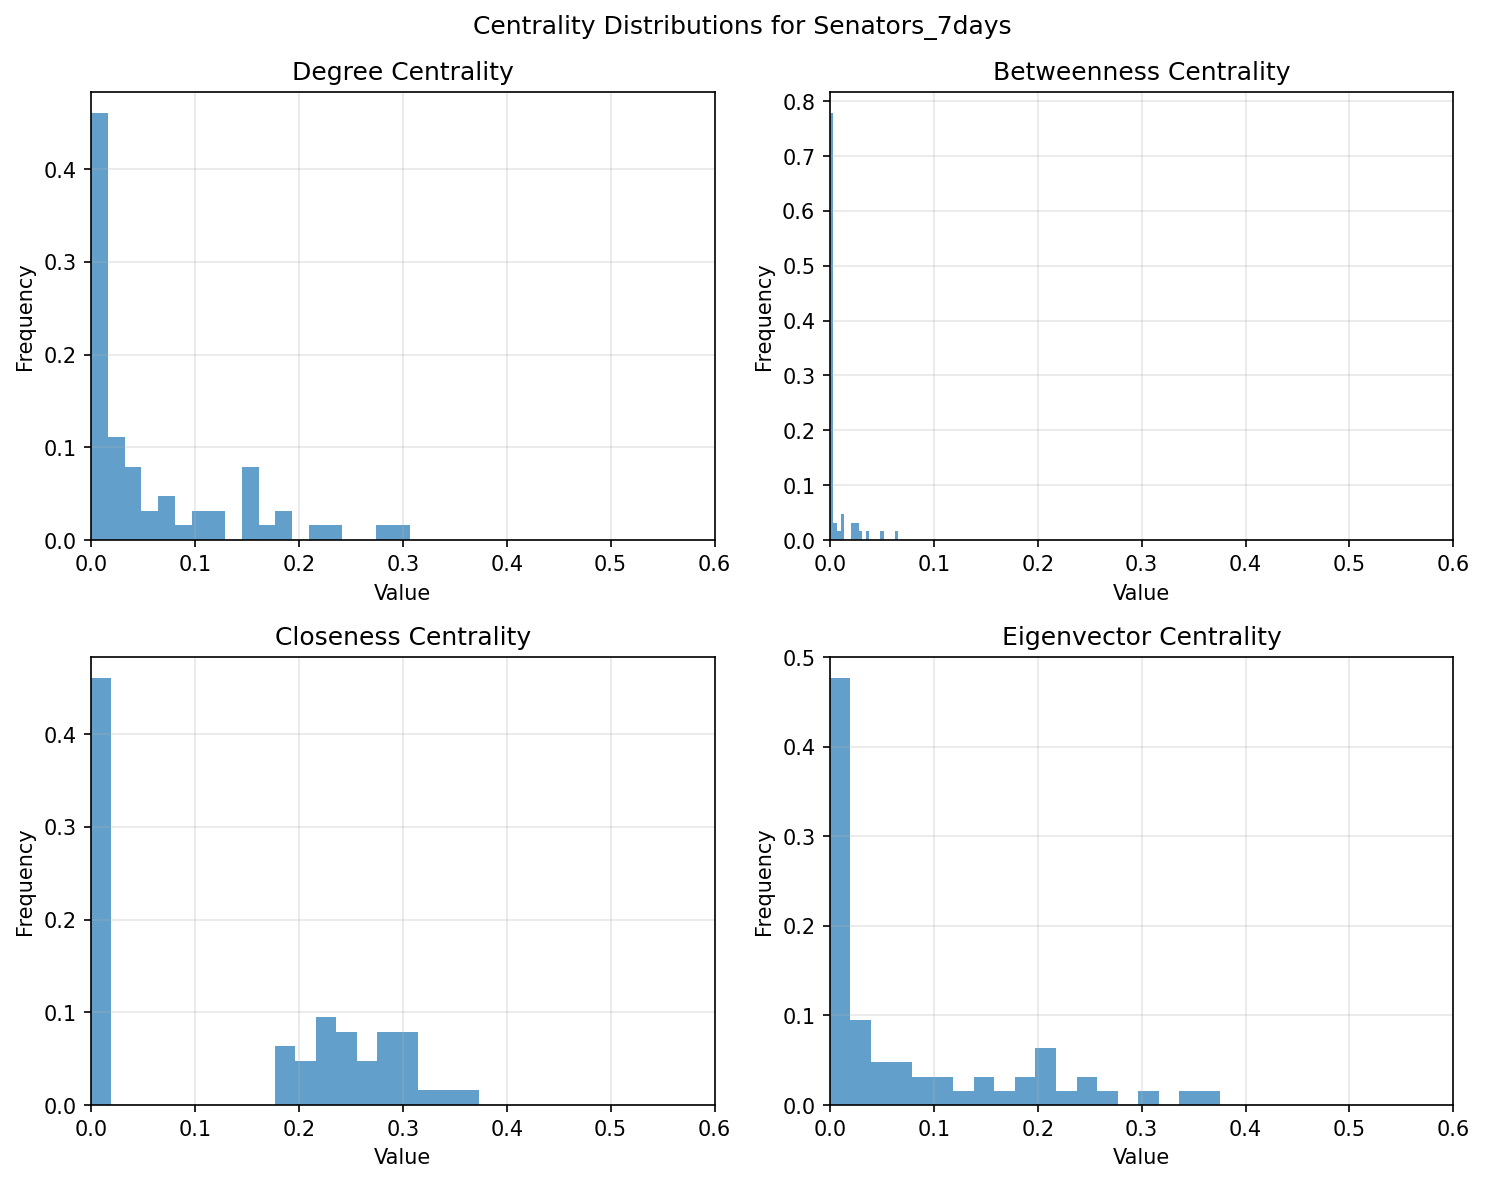

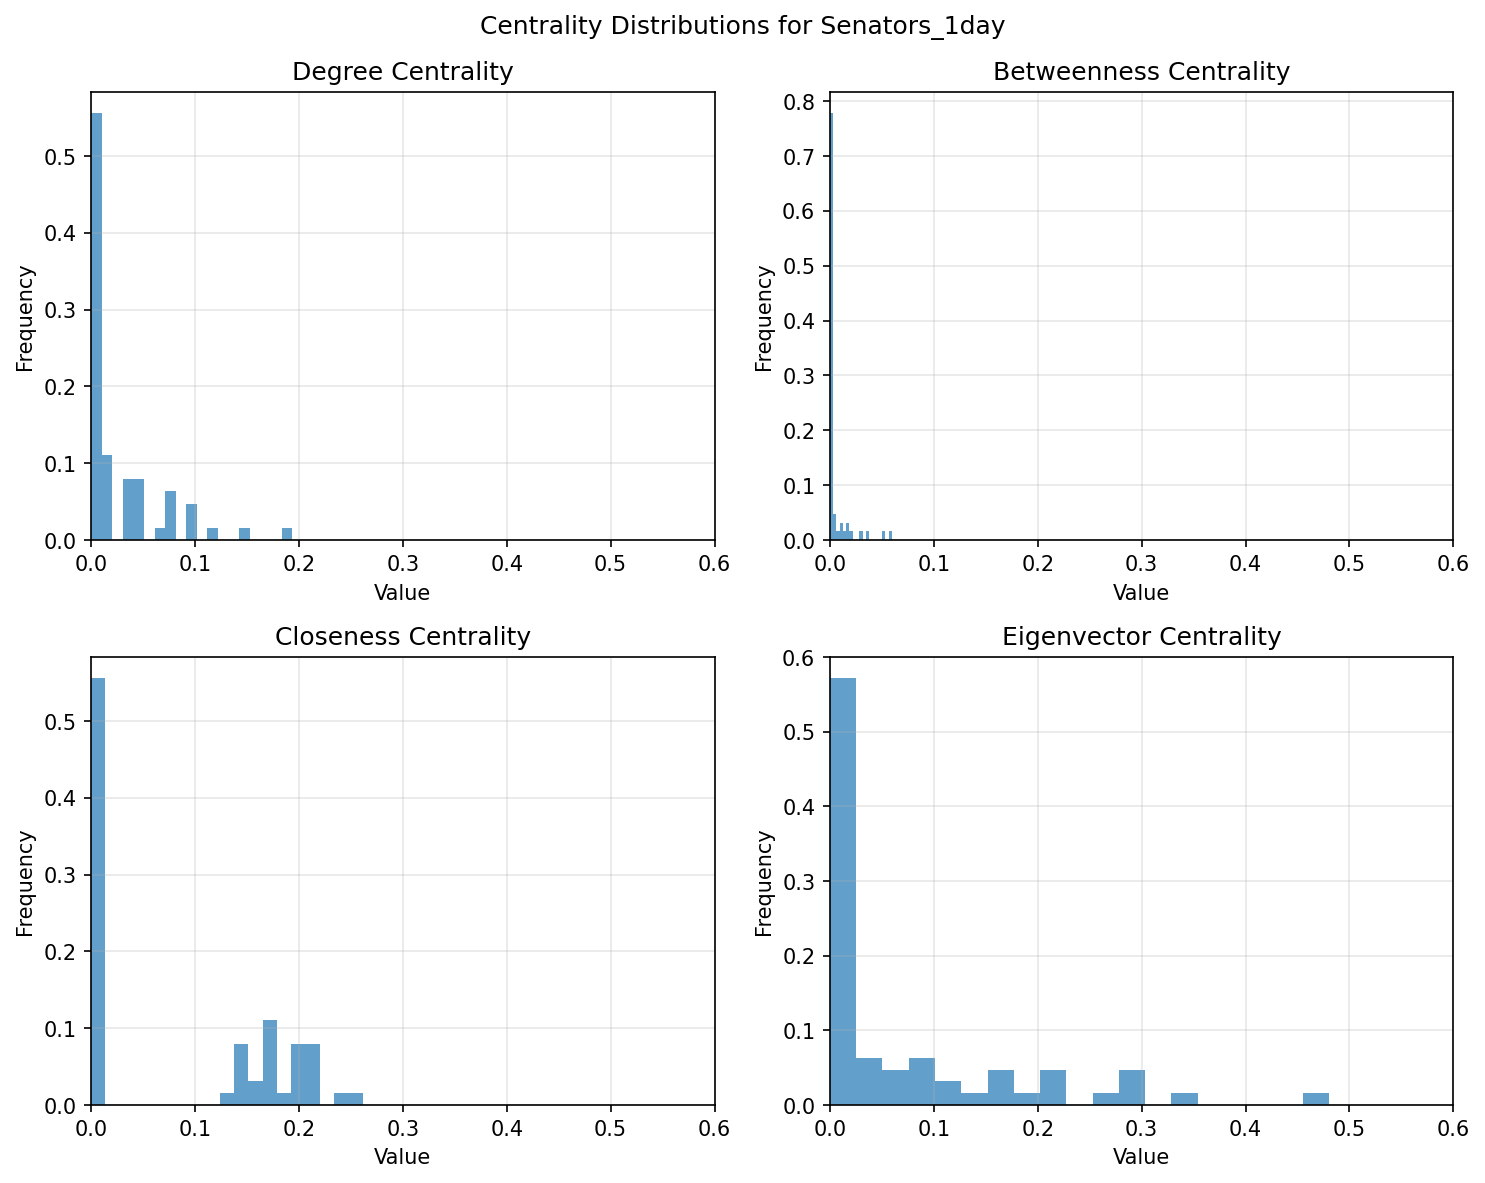

In [ ]:
# Centrality names and titles for plotting
centrality_titles = [
    ('degree', "Degree Centrality"),
    ('betweenness', "Betweenness Centrality"),
    ('closeness', "Closeness Centrality"),
    ('eigenvector', "Eigenvector Centrality")
]

all_sorted_degree_dicts = {}
all_sorted_betwns_dicts = {}
all_sorted_closen_dicts = {}
all_sorted_eigenv_dicts = {}

for dataset_file, dataset_label in datasets:
    G = nx.read_gml(dataset_file, label='id')
    
    # Calculate centralities
    degree, betwns, closen, eigenv, degree_dic, betwns_dic, closen_dic, eigenv_dic = calculate_centralities(G)

    sorted_degree_dic = dict(sorted(degree_dic.items(), key=lambda item: item[1], reverse=True))
    sorted_betwns_dic = dict(sorted(betwns_dic.items(), key=lambda item: item[1], reverse=True))
    sorted_closen_dic = dict(sorted(closen_dic.items(), key=lambda item: item[1], reverse=True))
    sorted_eigenv_dic = dict(sorted(eigenv_dic.items(), key=lambda item: item[1], reverse=True))
    
    # Store the sorted degree centrality dictionary in the main dictionary
    all_sorted_degree_dicts[dataset_label] = sorted_degree_dic
    all_sorted_betwns_dicts[dataset_label] = sorted_betwns_dic
    all_sorted_closen_dicts[dataset_label] = sorted_closen_dic
    all_sorted_eigenv_dicts[dataset_label] = sorted_eigenv_dic

    
    # Store centralities in a dictionary for easier access
    centralities = {
        'degree': degree,
        'betweenness': betwns,
        'closeness': closen,
        'eigenvector': eigenv
    }
    
    fig, axs = plt.subplots(2, 2, figsize=(10,8), dpi=150)
    fig.suptitle(f'Centrality Distributions for {dataset_label}')

    for ax, (centrality_key, centrality_title) in zip(axs.flatten(), centrality_titles):
        data = centralities[centrality_key]

        minimum = np.min(data)
        maximum = np.max(data)
        bins = np.linspace(minimum, maximum, num=20)

        counts, bins = np.histogram(data, bins)

        normalized_counts = counts / sum(counts)
        ax.bar(bins[:-1], normalized_counts, width=np.diff(bins), align="edge", alpha=0.7)

        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')
        ax.set_title(centrality_title)

        ax.set_xlim(0,0.6)
        ax.set_ylim(0,)

        ax.grid(True, alpha=0.3)

    fig.tight_layout()
    plt.show()

In [5]:
top_degree = {}
top_betweenness = {}
top_closeness = {}
top_eigenvector = {}

# Extract the top 3 elements from each sorted dictionary
for dataset_label in all_sorted_degree_dicts:
    top_degree[dataset_label] = list(all_sorted_degree_dicts[dataset_label].items())[:3]
    top_betweenness[dataset_label] = list(all_sorted_betwns_dicts[dataset_label].items())[:3]   
    top_closeness[dataset_label] = list(all_sorted_closen_dicts[dataset_label].items())[:3]
    top_eigenvector[dataset_label] = list(all_sorted_eigenv_dicts[dataset_label].items())[:3]

# Display the top 3 centralities
print("Top 3 Degree Centralities:")
for label, values in top_degree.items():
    print(f"{label}: {values}")

print("\nTop 3 Betweenness Centralities:")
for label, values in top_betweenness.items():
    print(f"{label}: {values}")

print("\nTop 3 Closeness Centralities:")
for label, values in top_closeness.items():
    print(f"{label}: {values}")

print("\nTop 3 Eigenvector Centralities:")
for label, values in top_eigenvector.items():
    print(f"{label}: {values}")


Top 3 Degree Centralities:
All_members_14days: [(8, 0.3778409090909091), (11, 0.2556818181818182), (181, 0.25)]
All_members_7days: [(8, 0.3380681818181818), (181, 0.21022727272727273), (11, 0.20738636363636365)]
All_members_1day: [(8, 0.20170454545454547), (208, 0.13068181818181818), (181, 0.10227272727272728)]
Democrat_members_14days: [(4, 0.37341772151898733), (51, 0.24683544303797467), (6, 0.24050632911392406)]
Democrat_members_7days: [(4, 0.3481012658227848), (38, 0.20253164556962025), (51, 0.20253164556962025)]
Democrat_members_1day: [(4, 0.22151898734177214), (80, 0.13291139240506328), (38, 0.10759493670886076)]
Representatives_14days: [(7, 0.37800687285223367), (86, 0.23024054982817868), (150, 0.2268041237113402)]
Representatives_7days: [(7, 0.3367697594501718), (86, 0.18900343642611683), (69, 0.1683848797250859)]
Representatives_1day: [(7, 0.1993127147766323), (145, 0.09278350515463918), (33, 0.08934707903780069)]
Republican_members_14days: [(98, 0.24210526315789474), (102, 0.2

### Plot comparison of pairs 


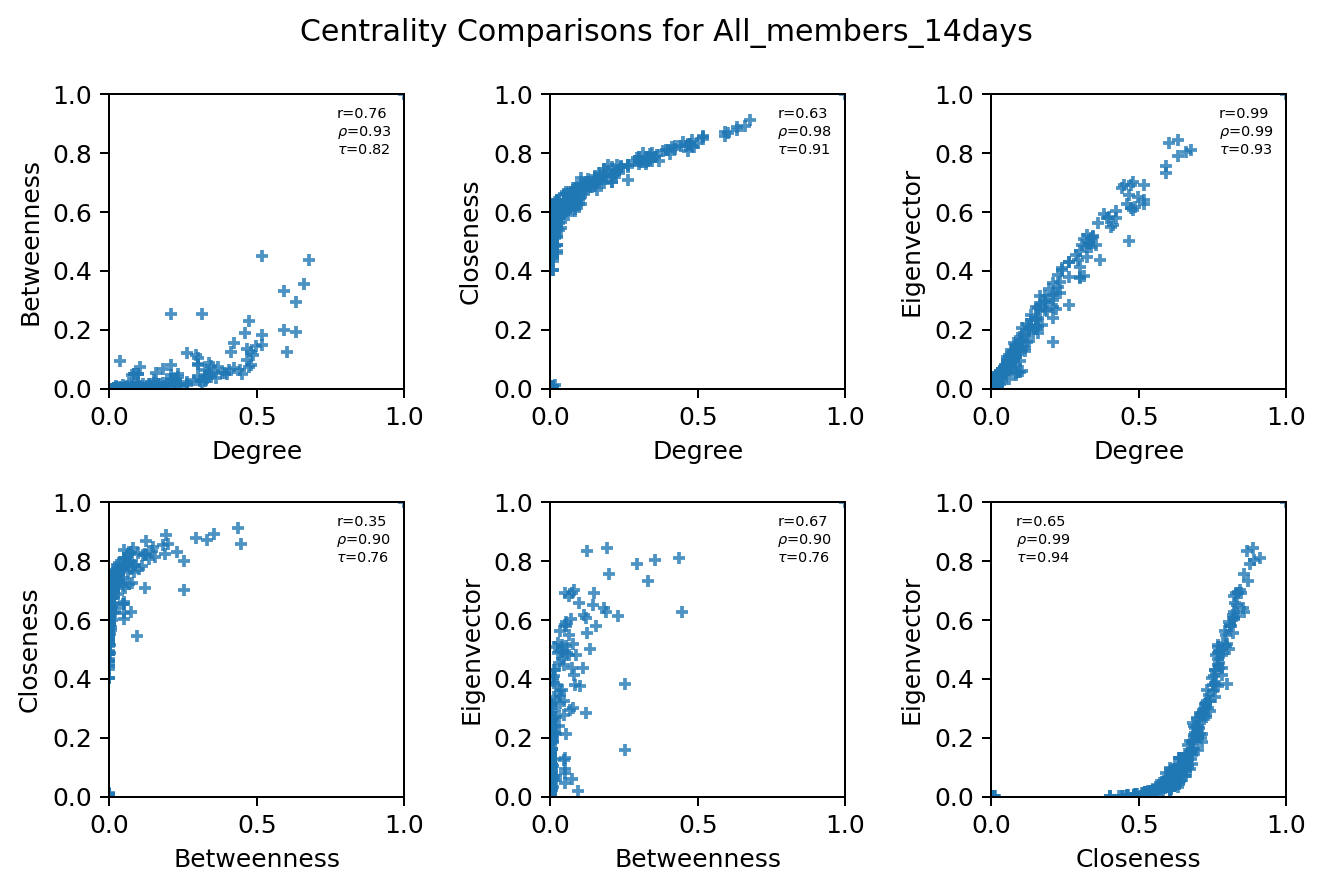

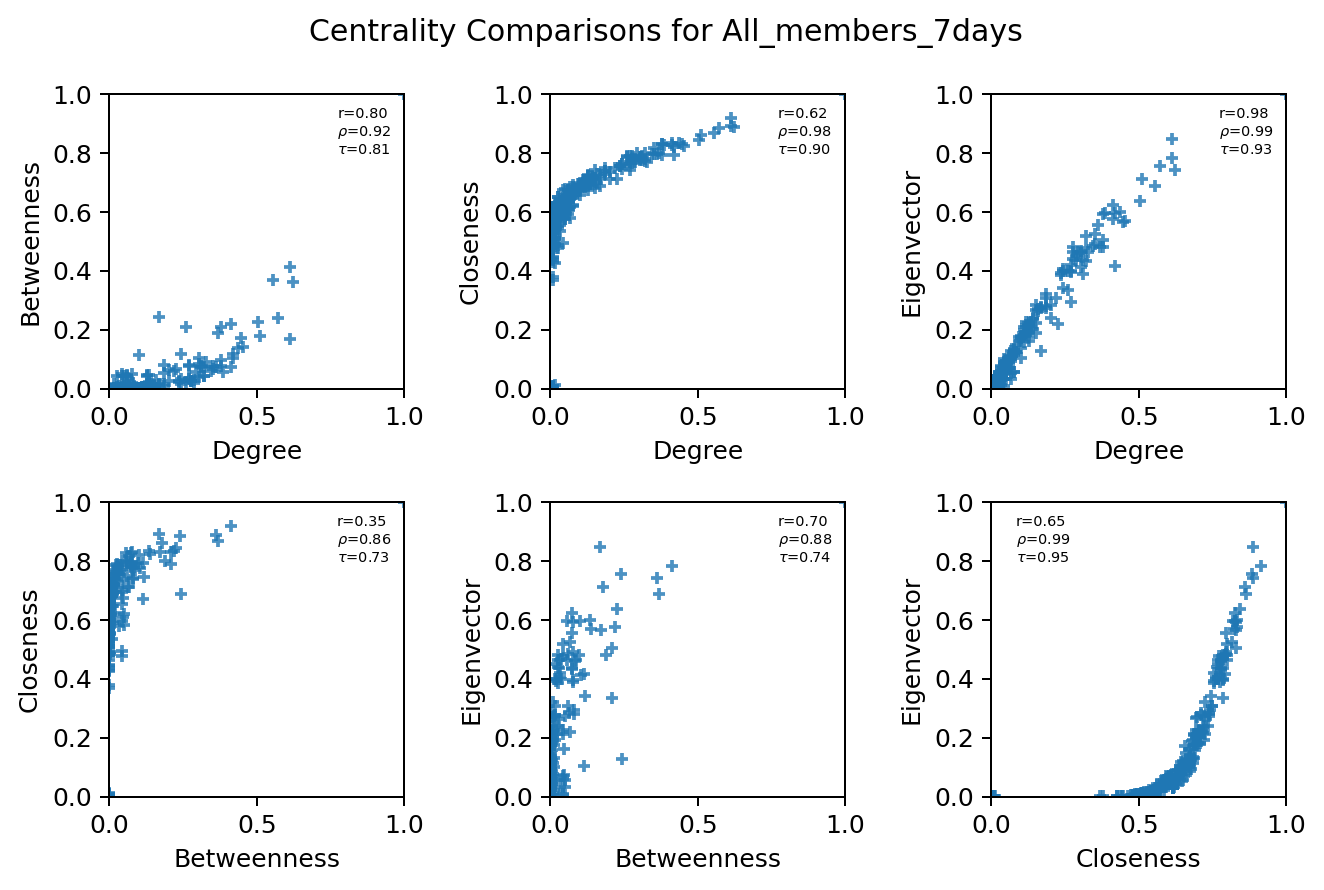

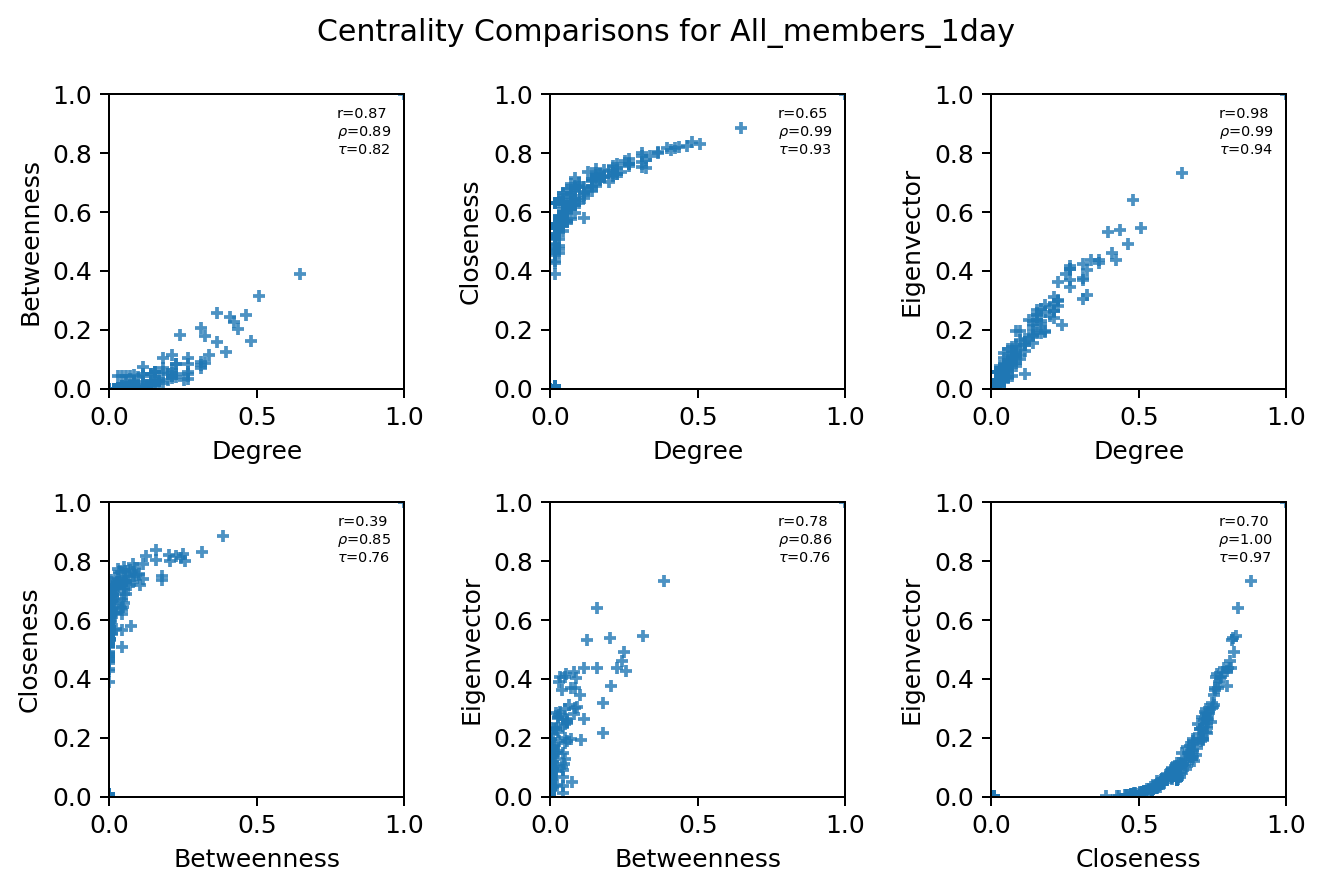

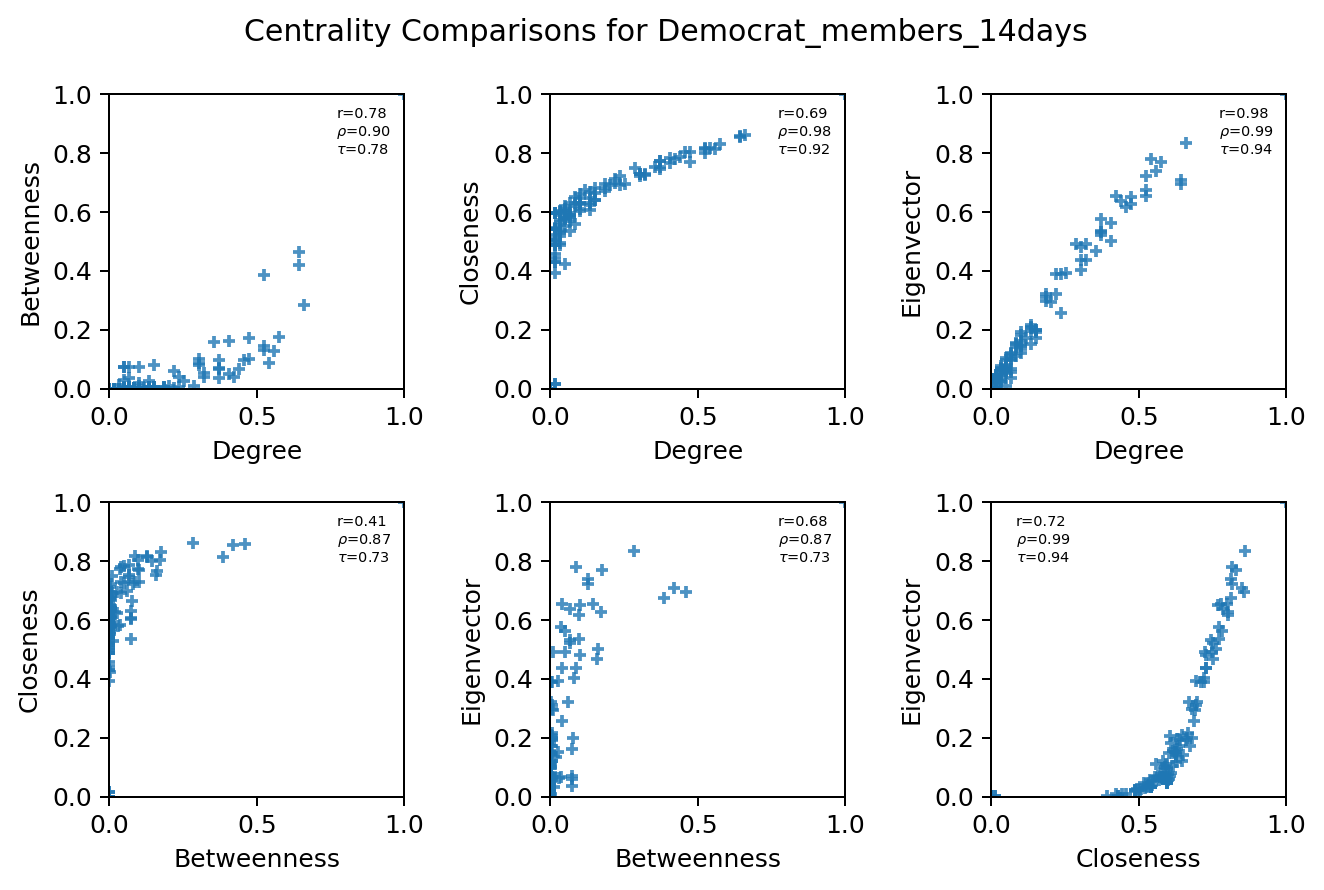

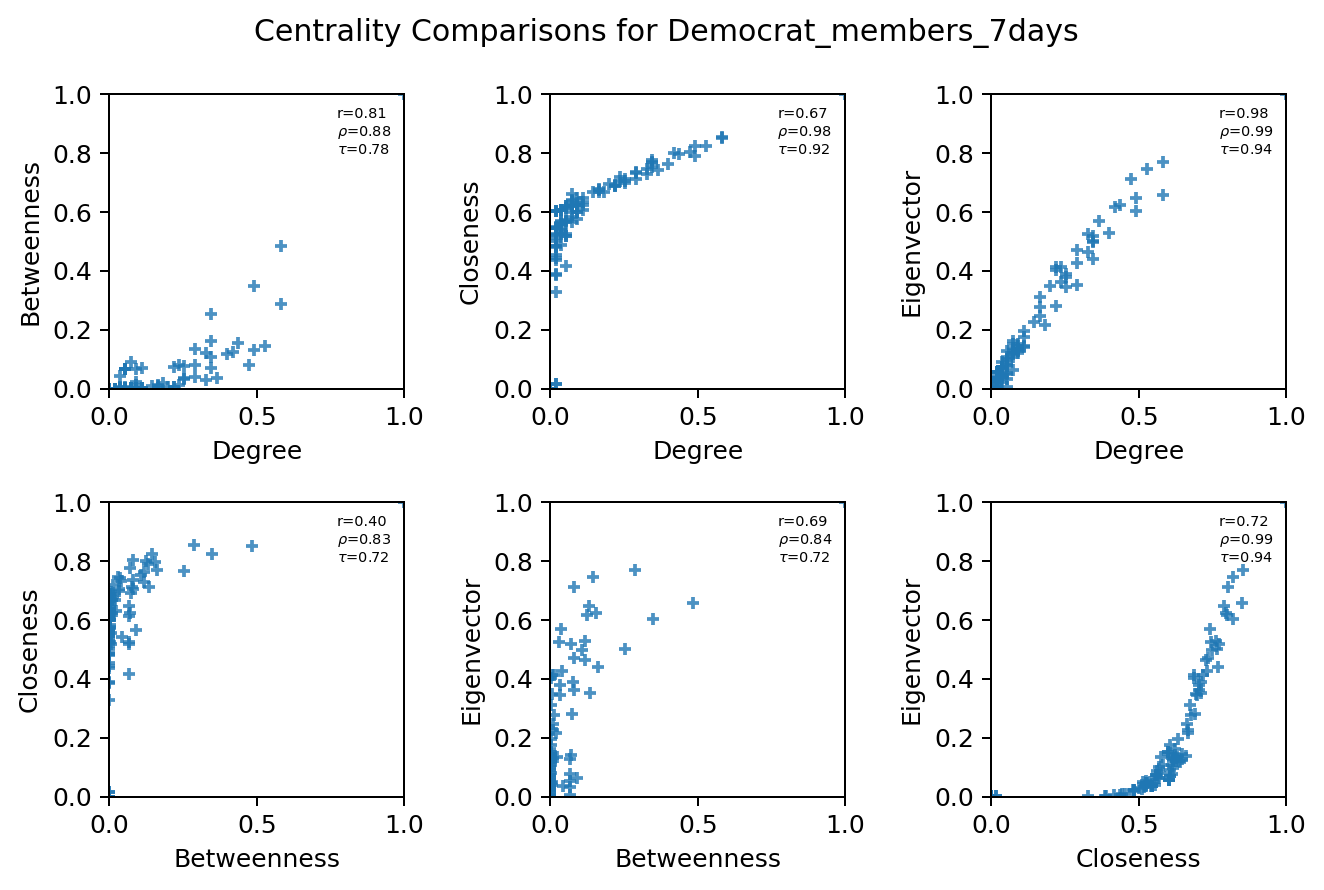

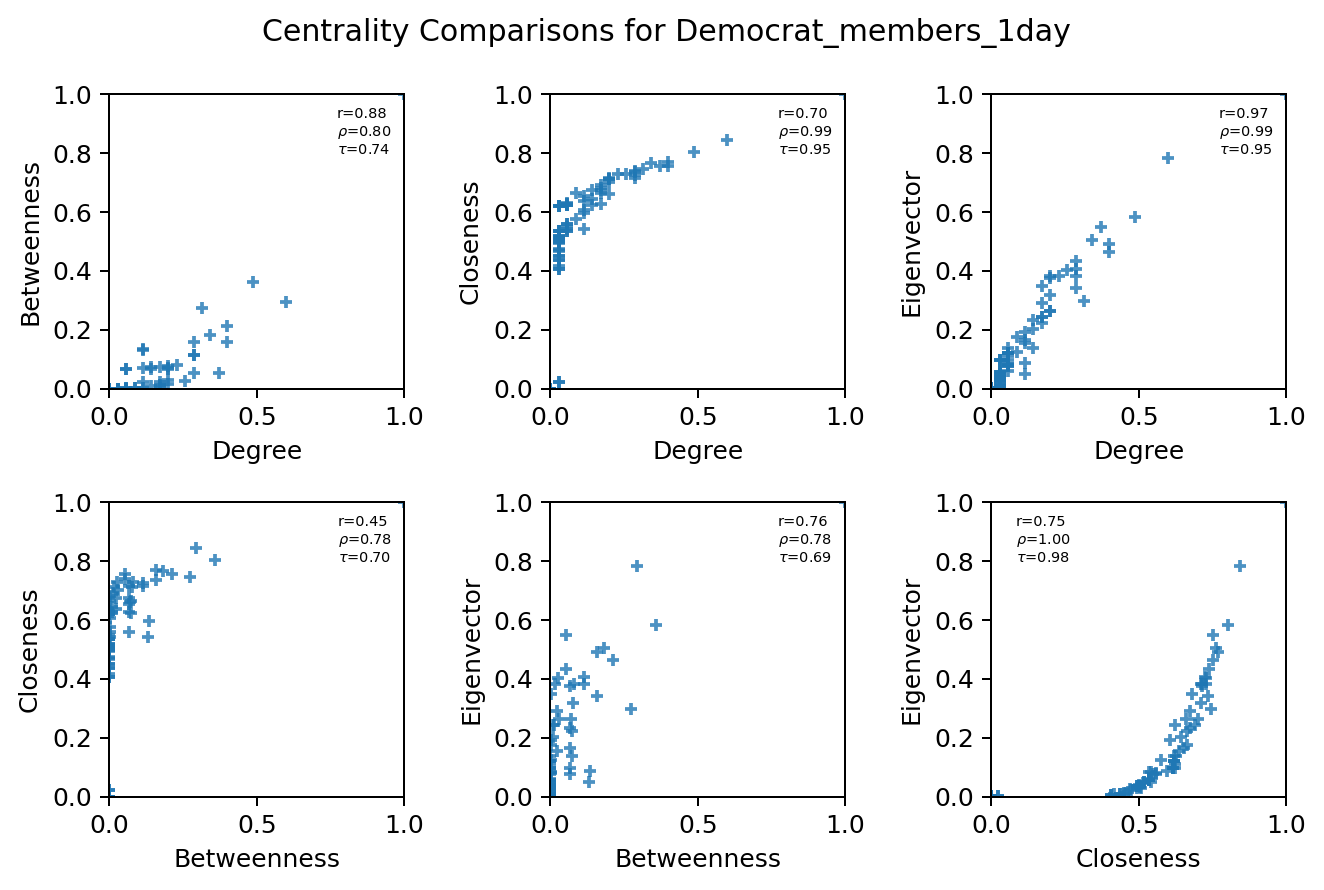

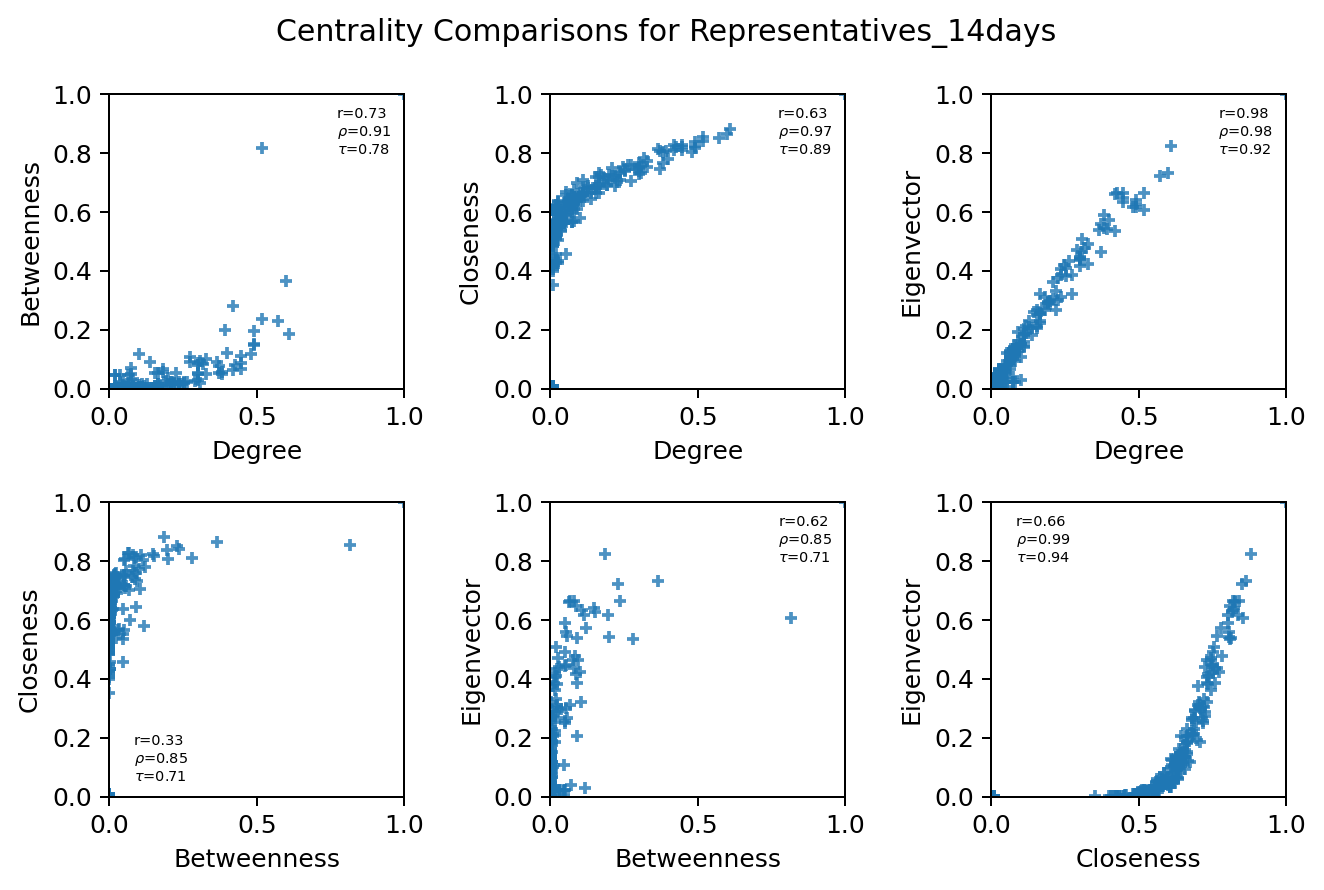

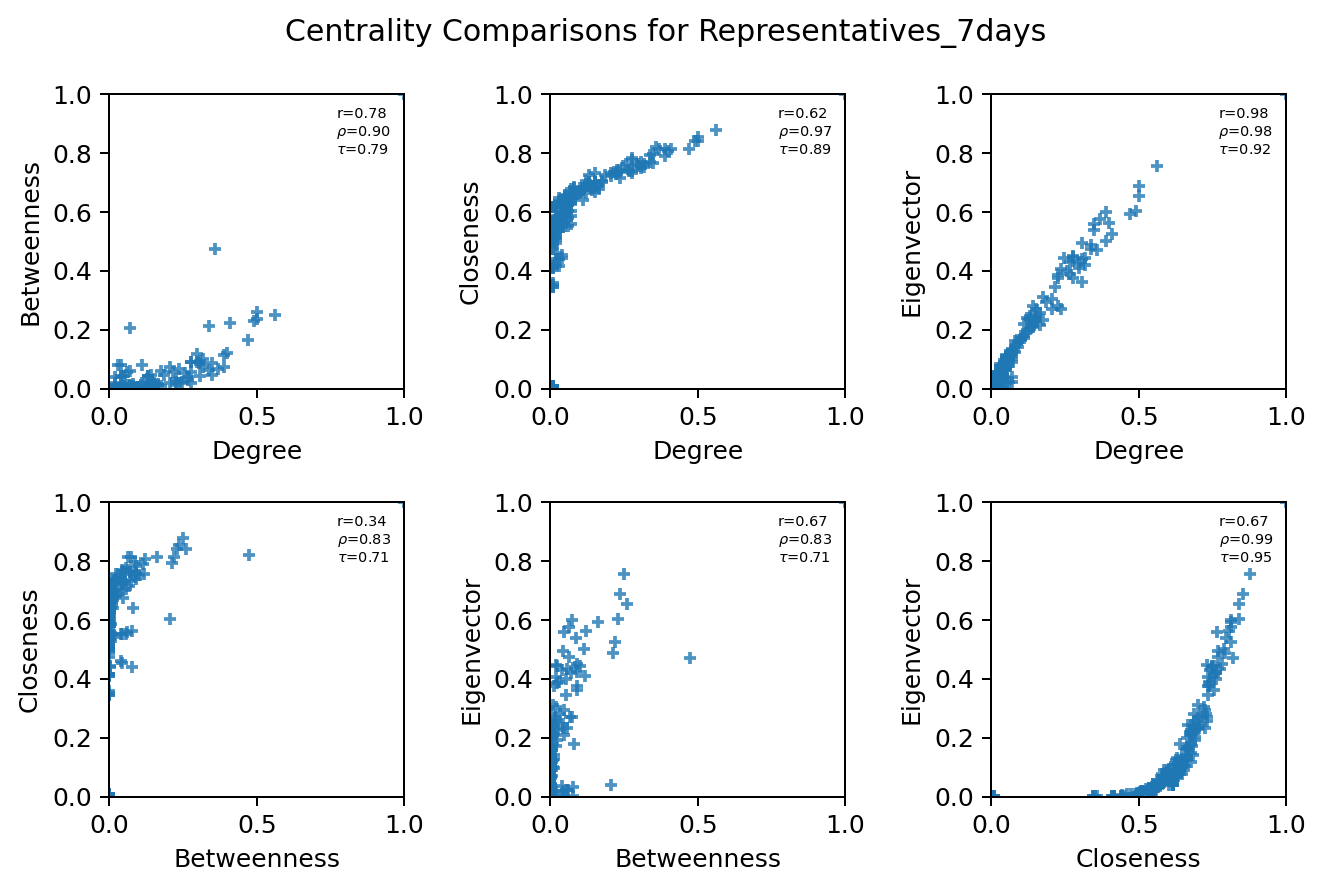

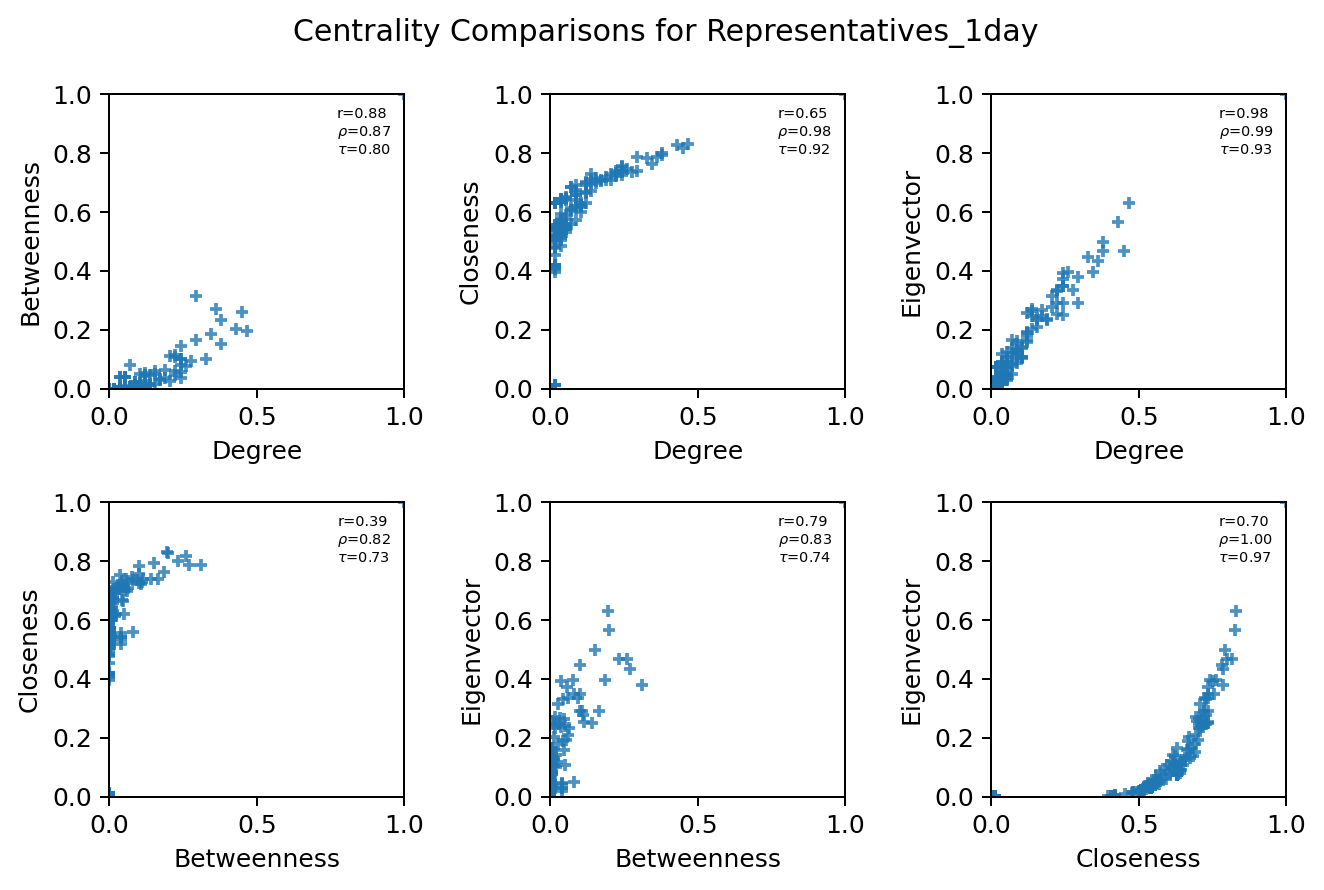

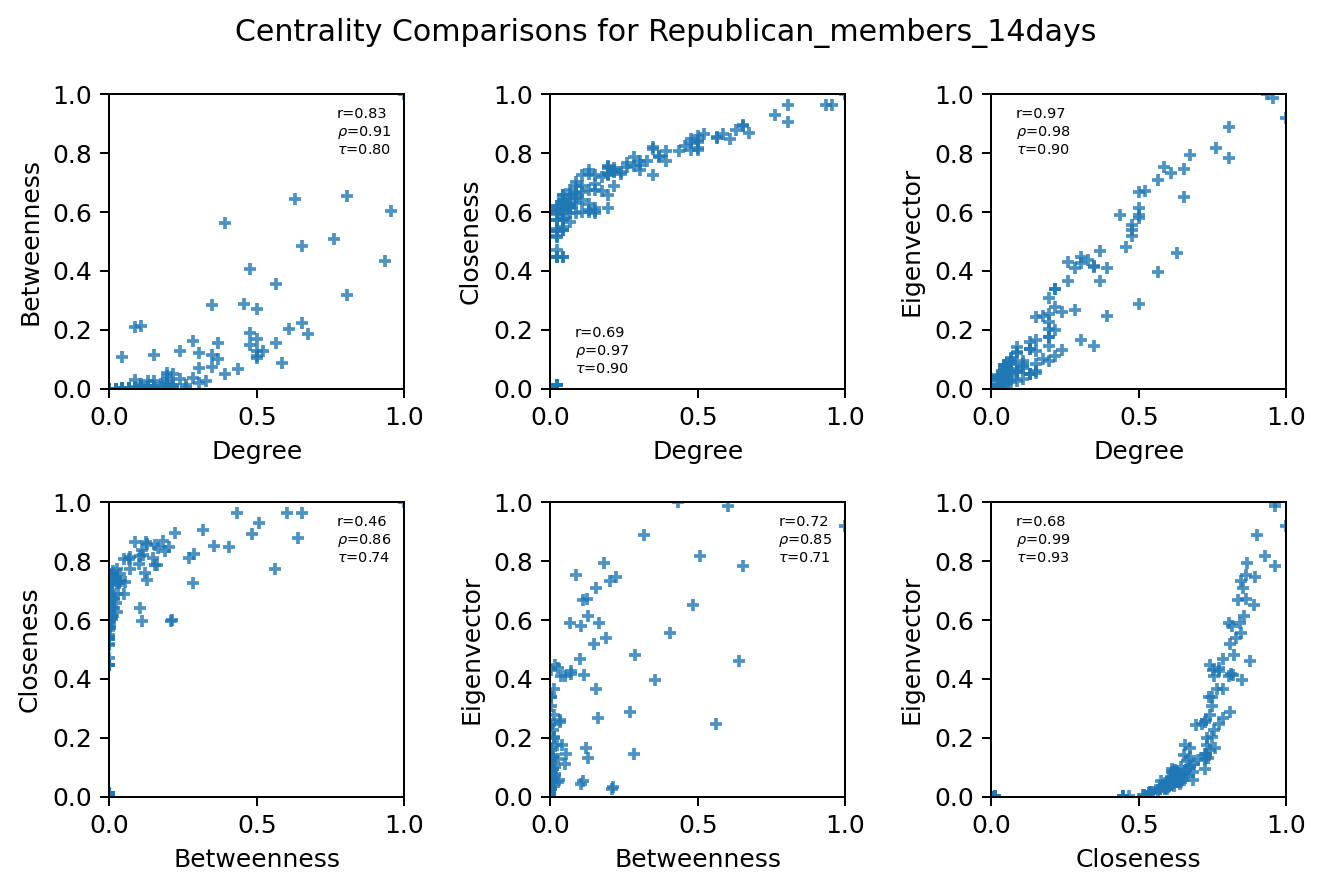

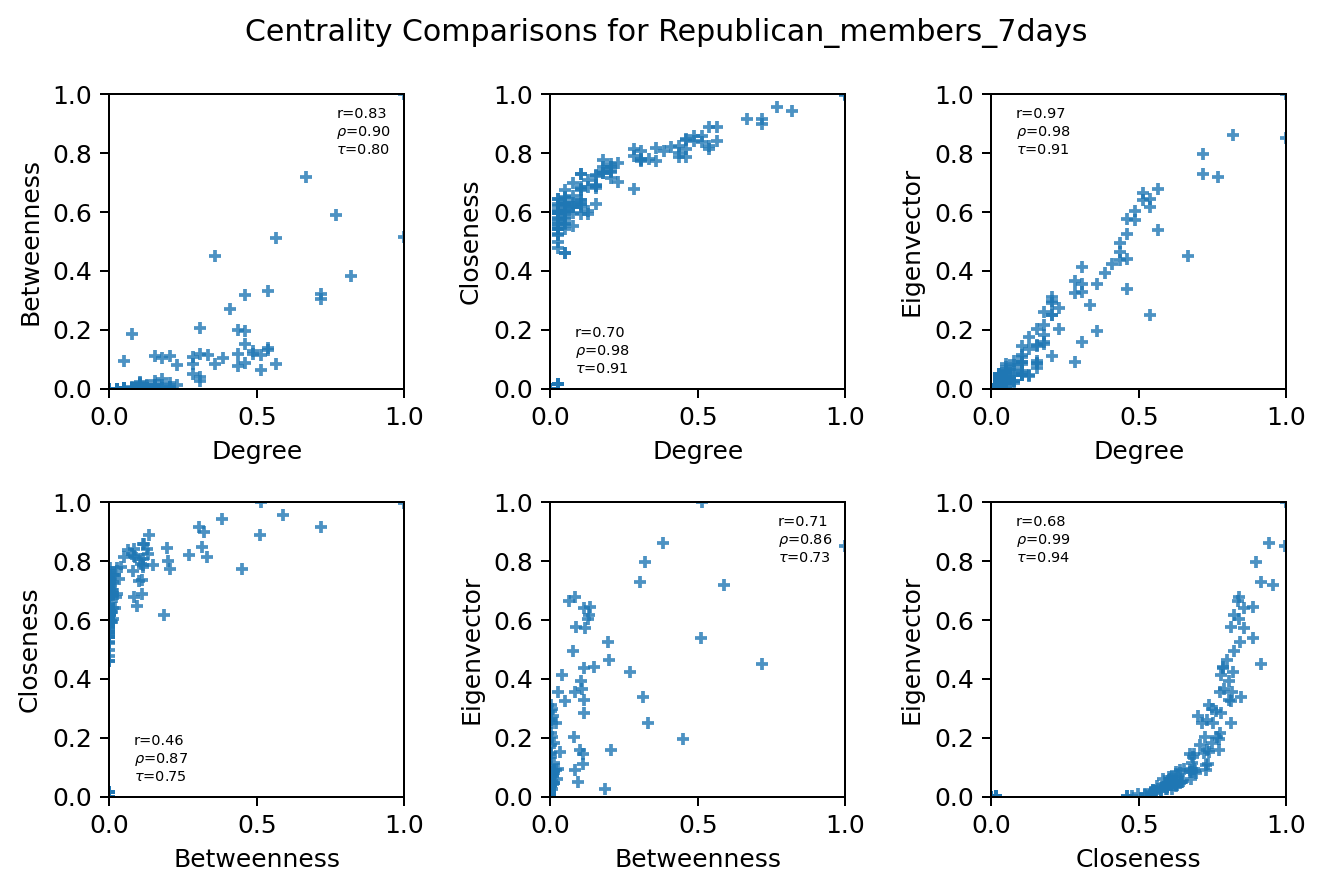

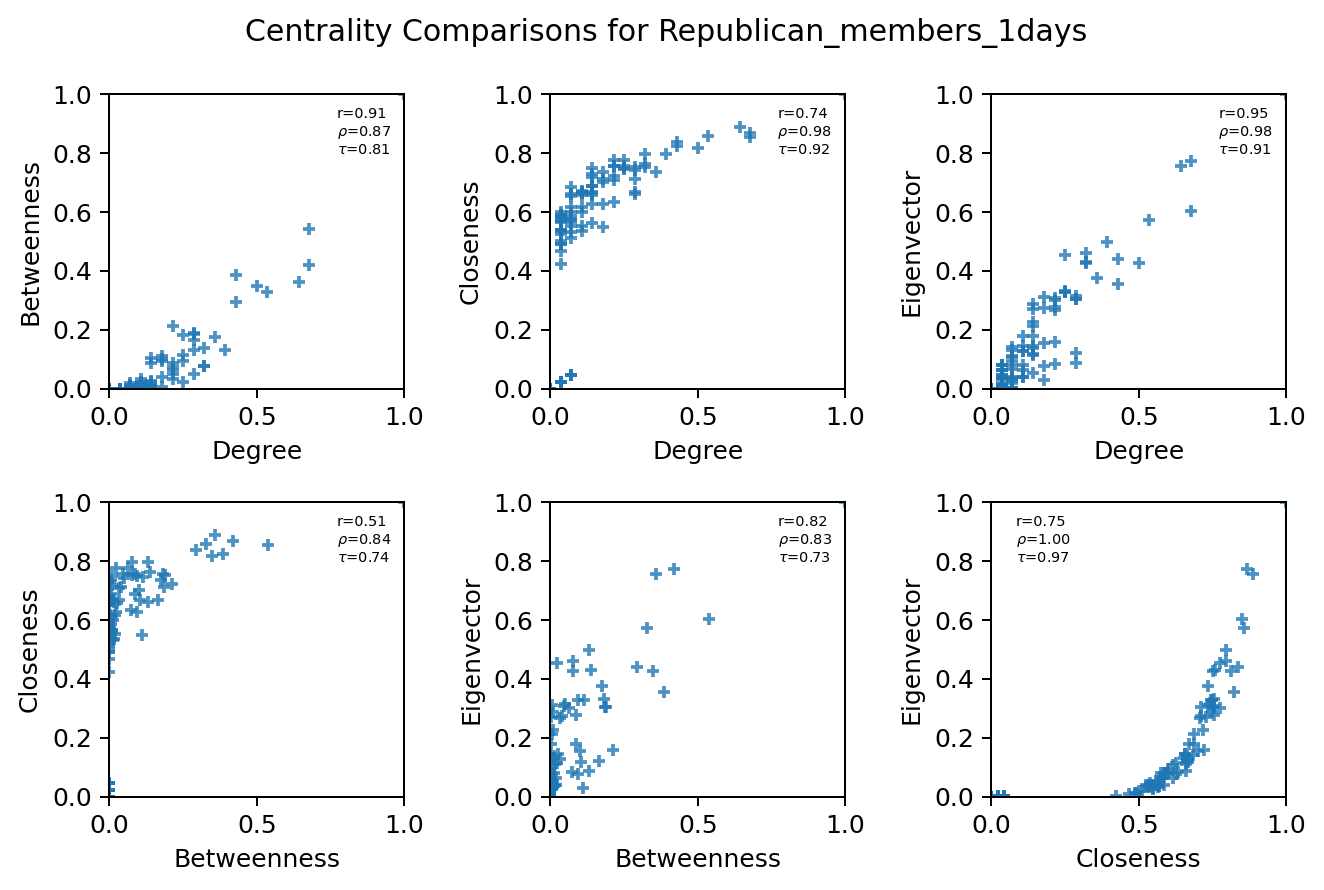

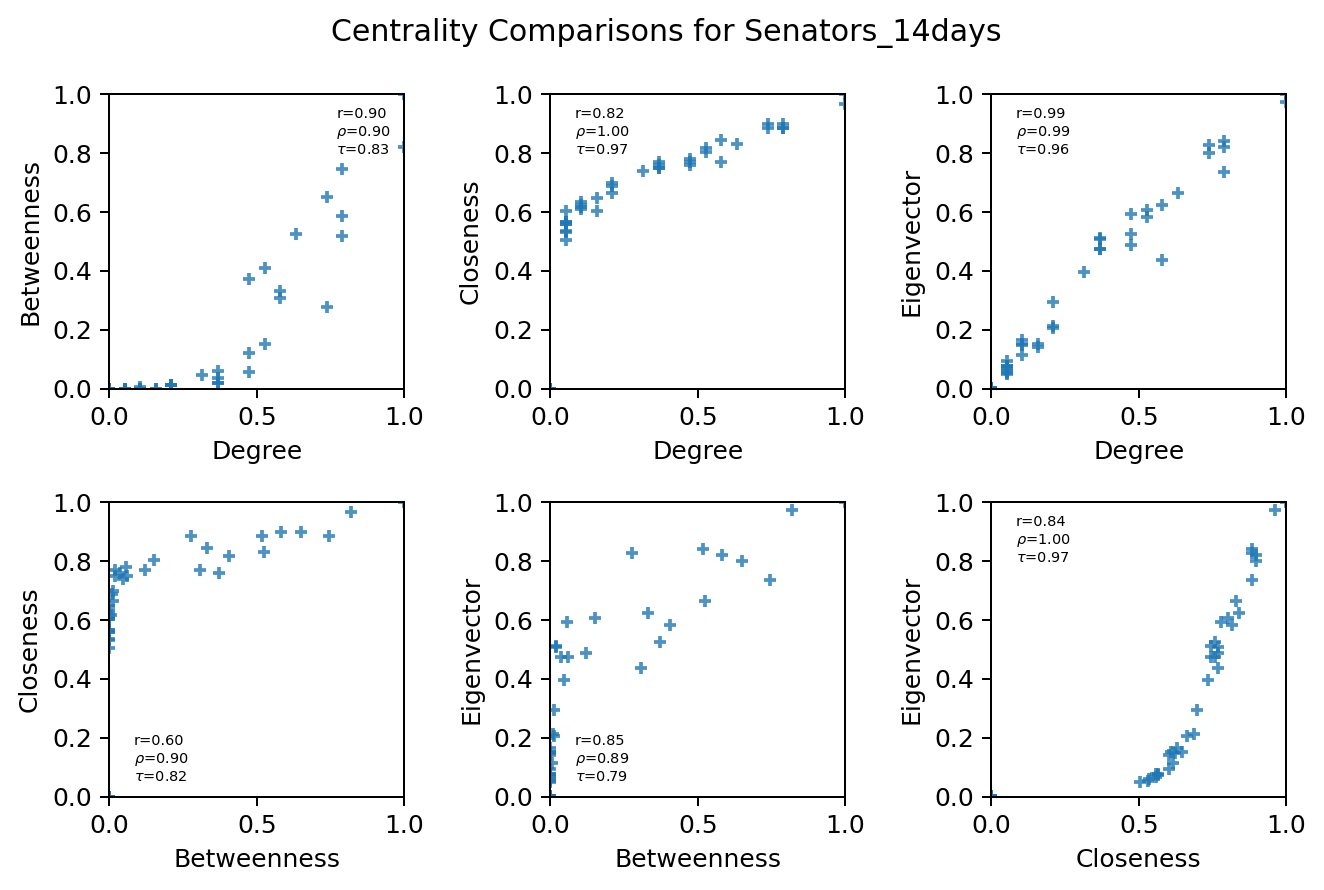

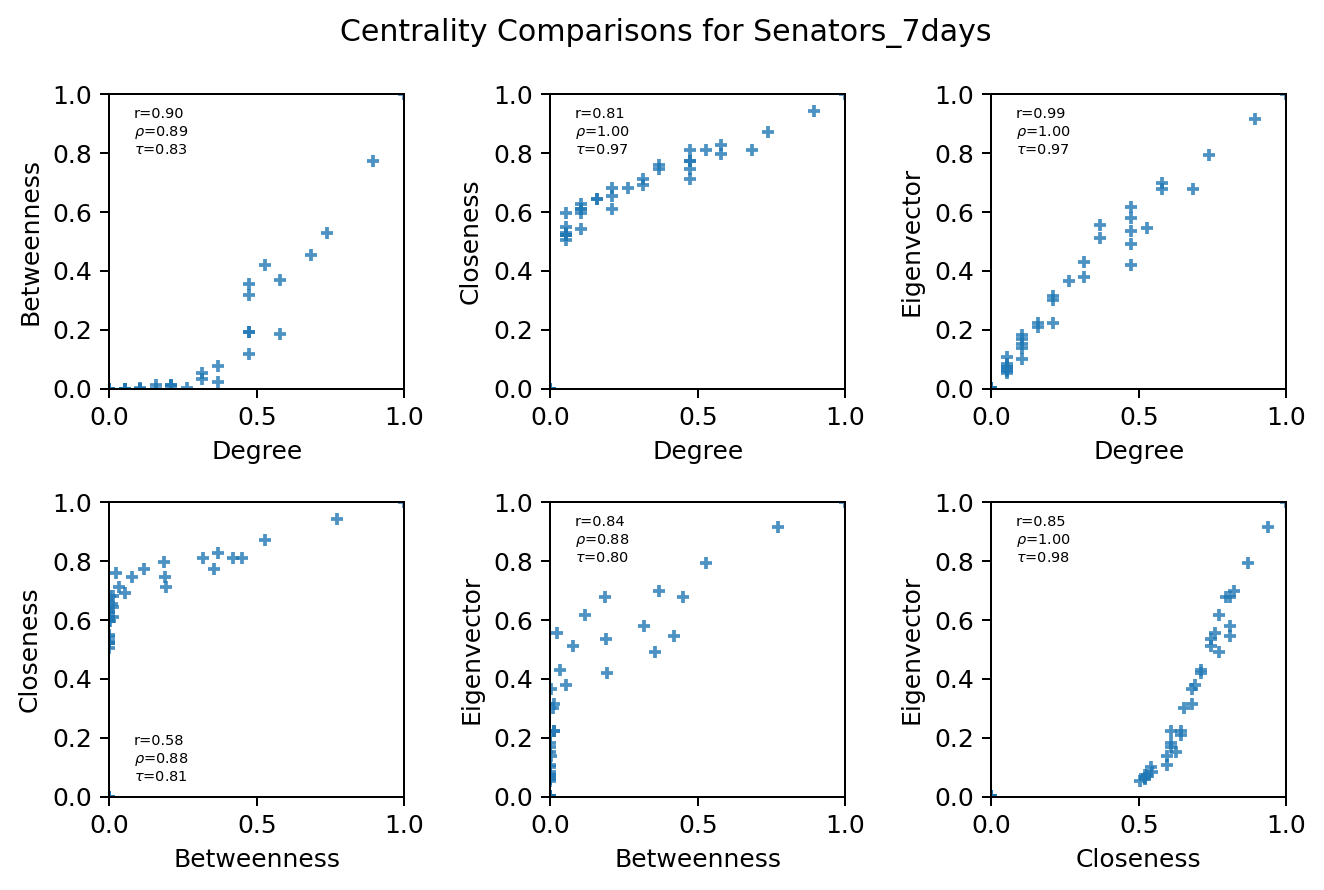

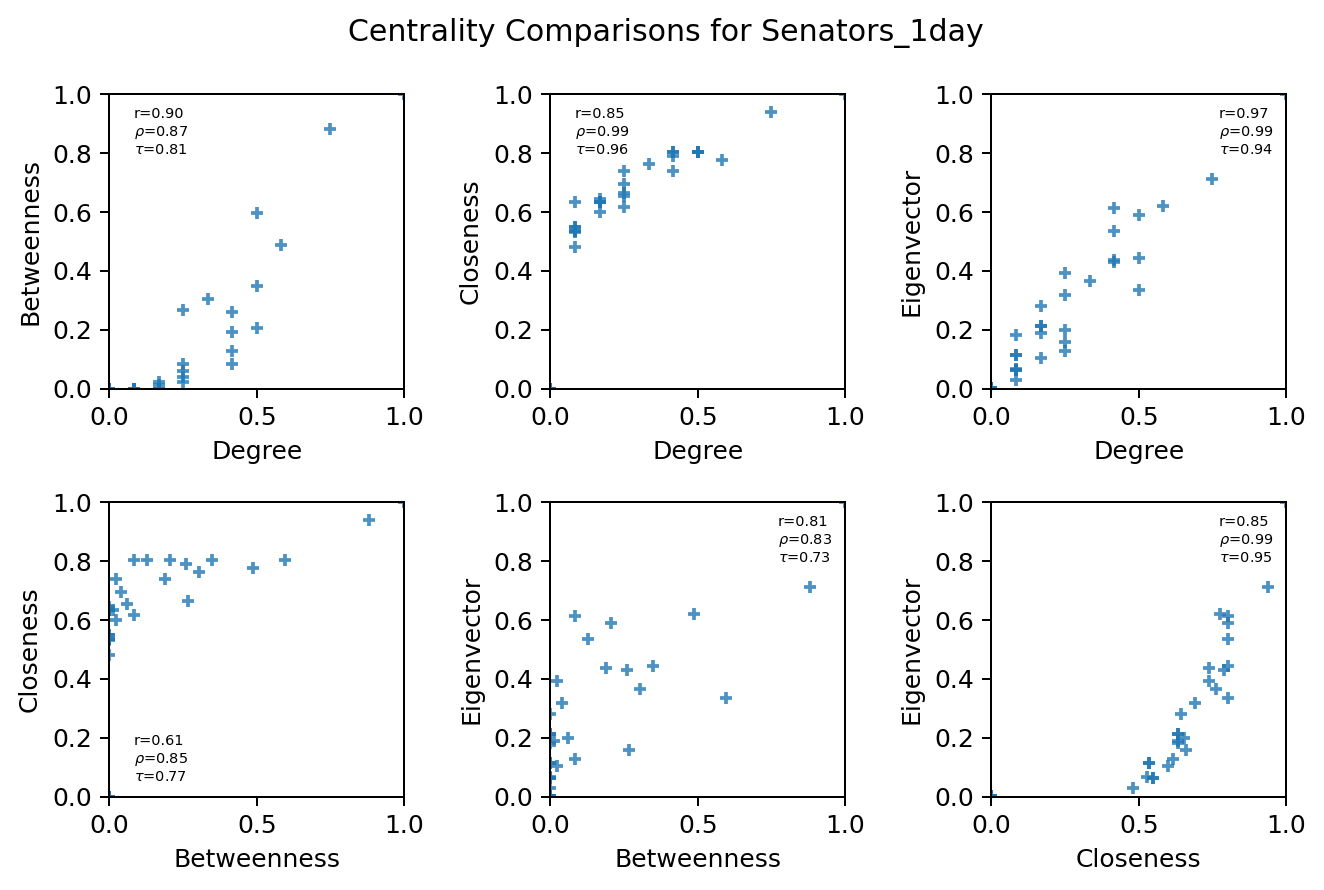

In [6]:
# Data pairs for plotting
plot_pairs = [
    ('degree', 'betweenness', 'Degree', 'Betweenness'),
    ('degree', 'closeness', 'Degree', 'Closeness'),
    ('degree', 'eigenvector', 'Degree', 'Eigenvector'),
    ('betweenness', 'closeness', 'Betweenness', 'Closeness'),
    ('betweenness', 'eigenvector', 'Betweenness', 'Eigenvector'),
    ('closeness', 'eigenvector', 'Closeness', 'Eigenvector')
]

for dataset_file, dataset_label in datasets:
    G = nx.read_gml(dataset_file, label='id')
    
    # Calculate centralities
    degree, betwns, closen, eigenv, degree_dic, betwns_dic, closen_dic, eigenv_dic = calculate_centralities(G)
    
    # Centralities dictionary
    centralities = {
        'degree': degree,
        'betweenness': betwns,
        'closeness': closen,
        'eigenvector': eigenv
    }

    fig, axs = plt.subplots(2, 3, figsize=(7.5,5), dpi=180)
    fig.suptitle(f'Centrality Comparisons for {dataset_label}')
    
    for ax, (x_key, y_key, labex, labey) in zip(axs.flatten(), plot_pairs):
        x = centralities[x_key]
        y = centralities[y_key]
        
        # Calculate Pearson, Spearman, and Kendall correlations
        pea = sp.stats.pearsonr(x, y)[0]
        spear = sp.stats.spearmanr(x, y)[0]
        kend = sp.stats.kendalltau(x, y)[0]

        ax.scatter(x / np.max(x), y / np.max(y), 
                    label=f"r={pea:.2f}\n"+r"$\rho$"+f"={spear:.2f}\n"+r"$\tau$"+f"={kend:.2f}",
                    s=20, alpha=0.8, marker='+')
        
        ax.set_xlabel(labex)
        ax.set_ylabel(labey)
        ax.set_xlim(0,1)
        ax.set_ylim(0,1)
        ax.set_aspect('equal')
        ax.legend(loc='best', frameon=False, shadow=False, ncol=1, 
                  fontsize='xx-small', handlelength=0, markerscale=0)

    fig.tight_layout()
    plt.show()

### Original vs randomized centralities

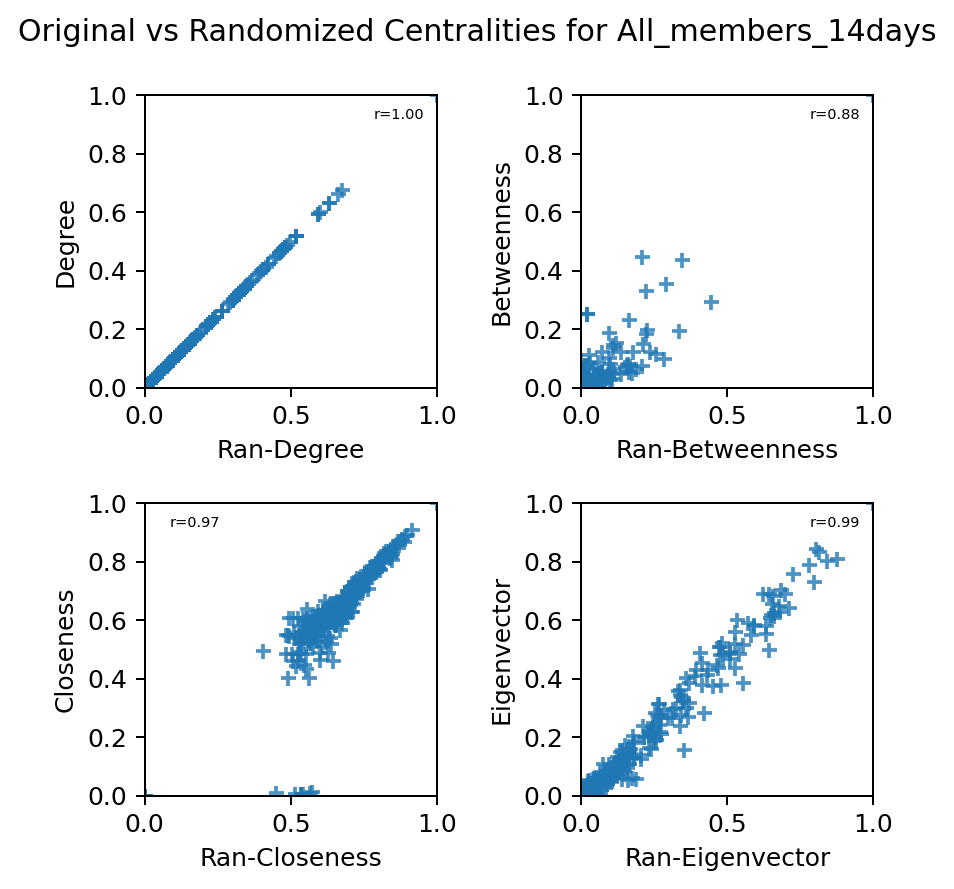

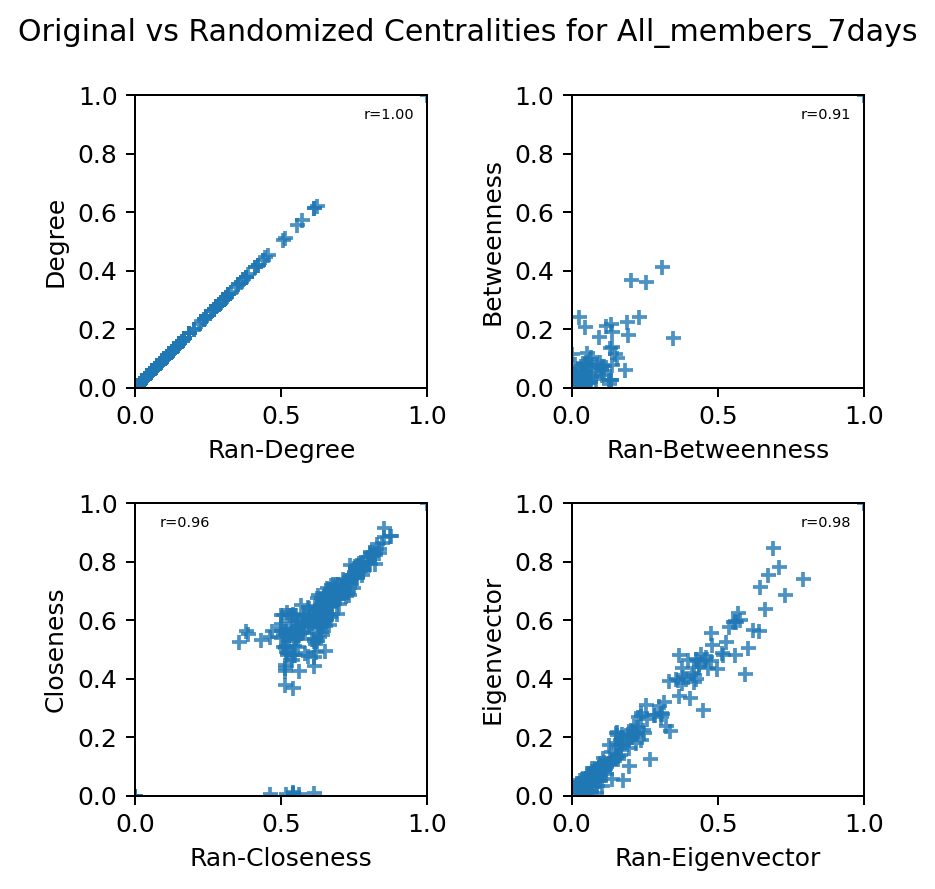

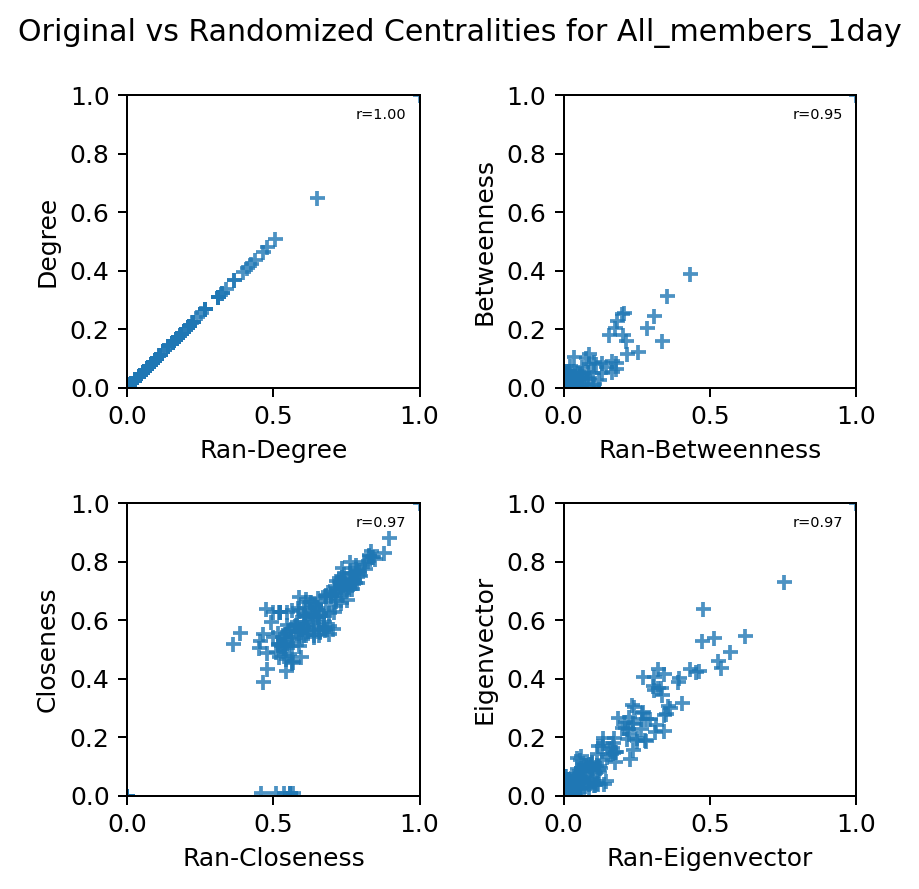

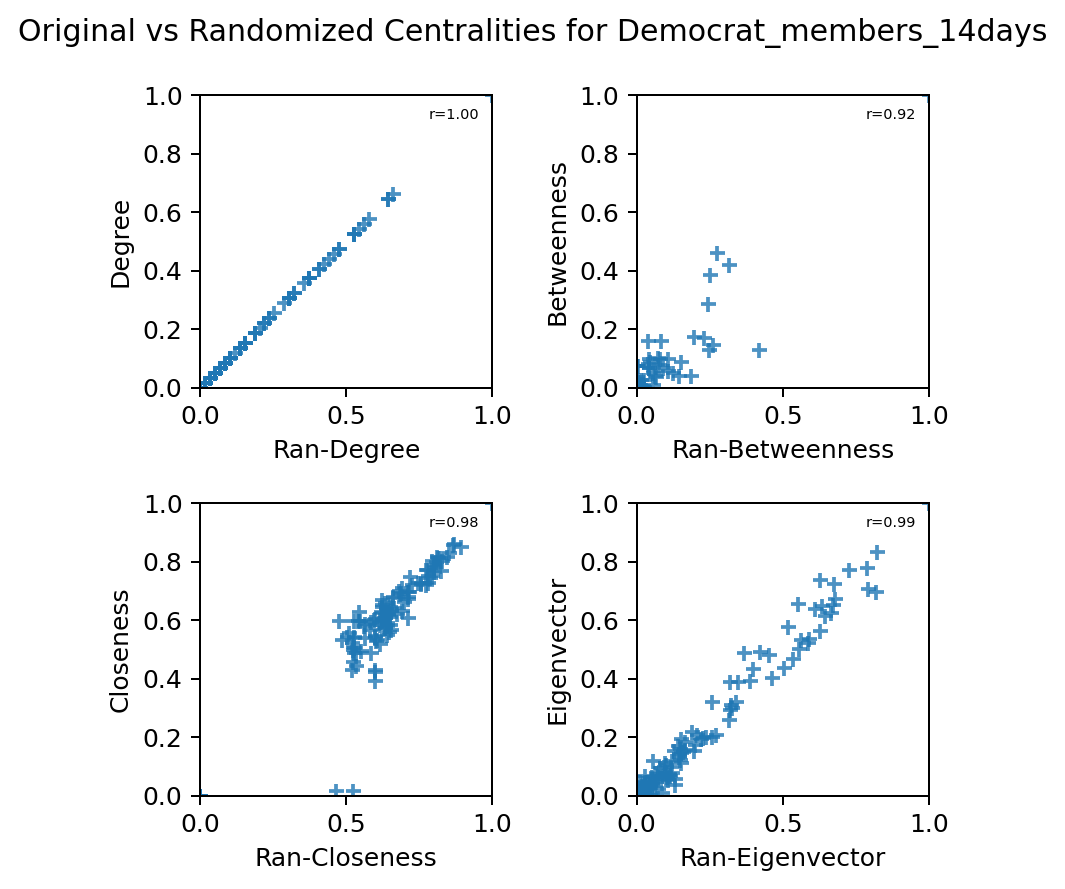

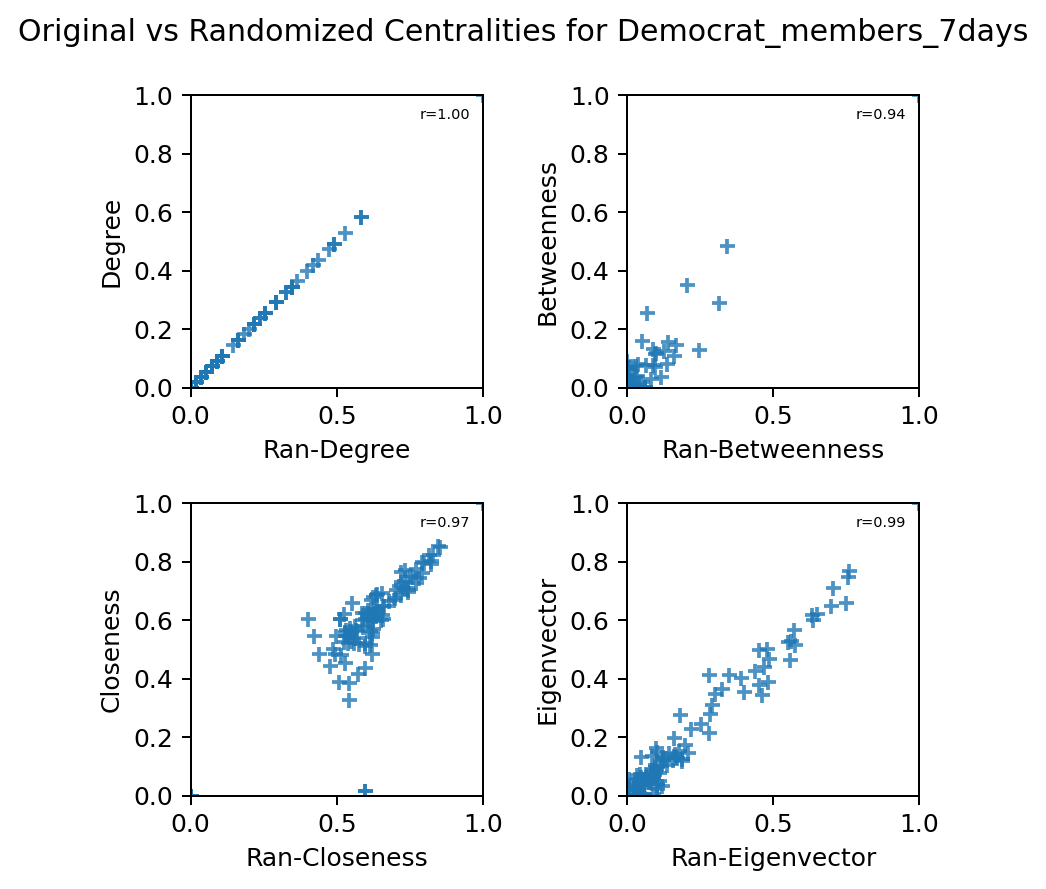

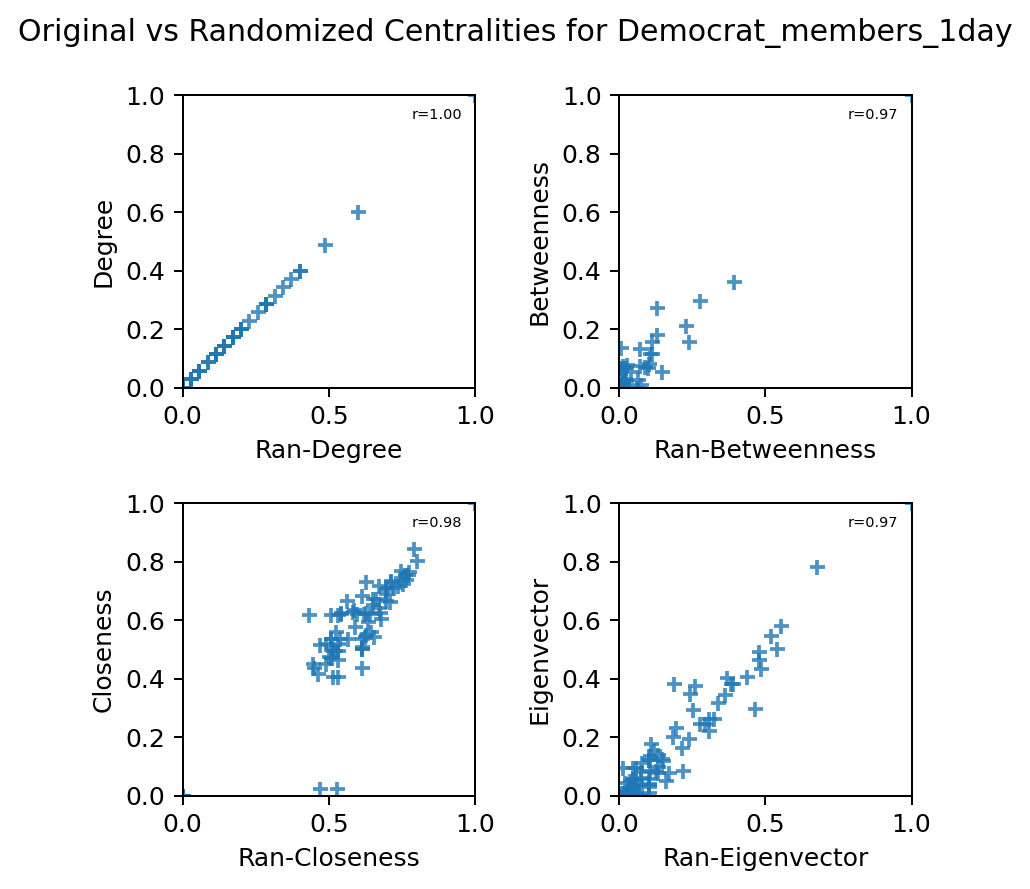

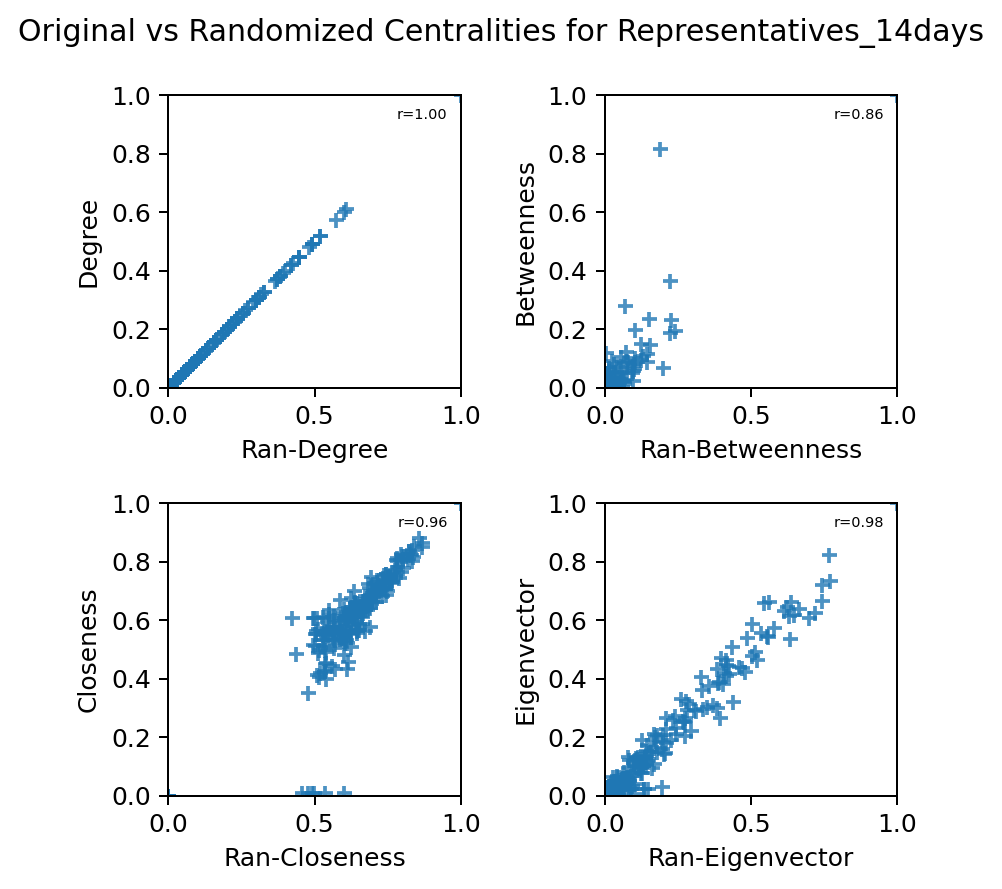

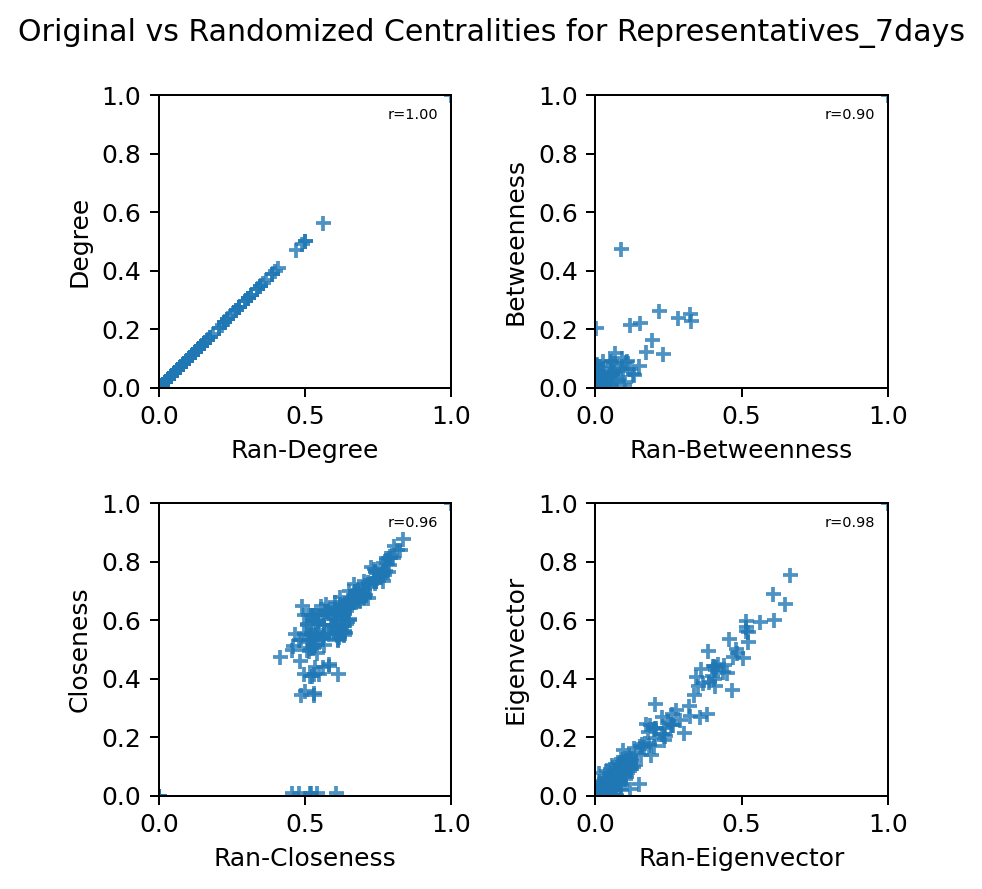

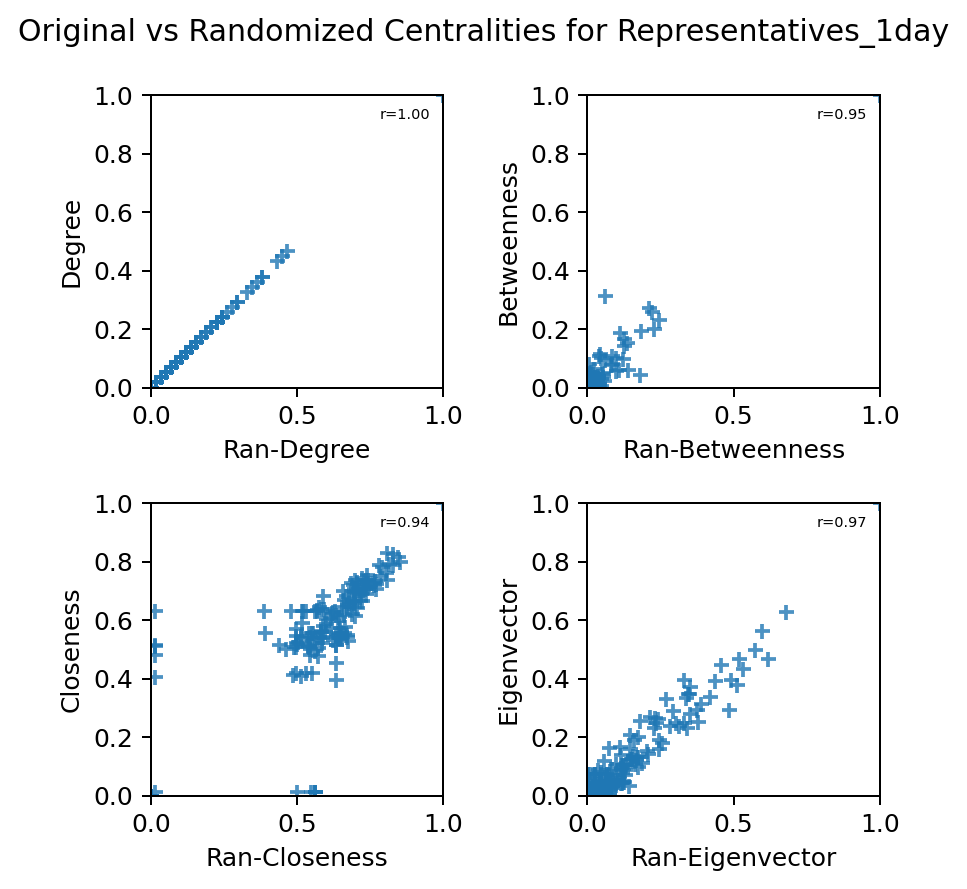

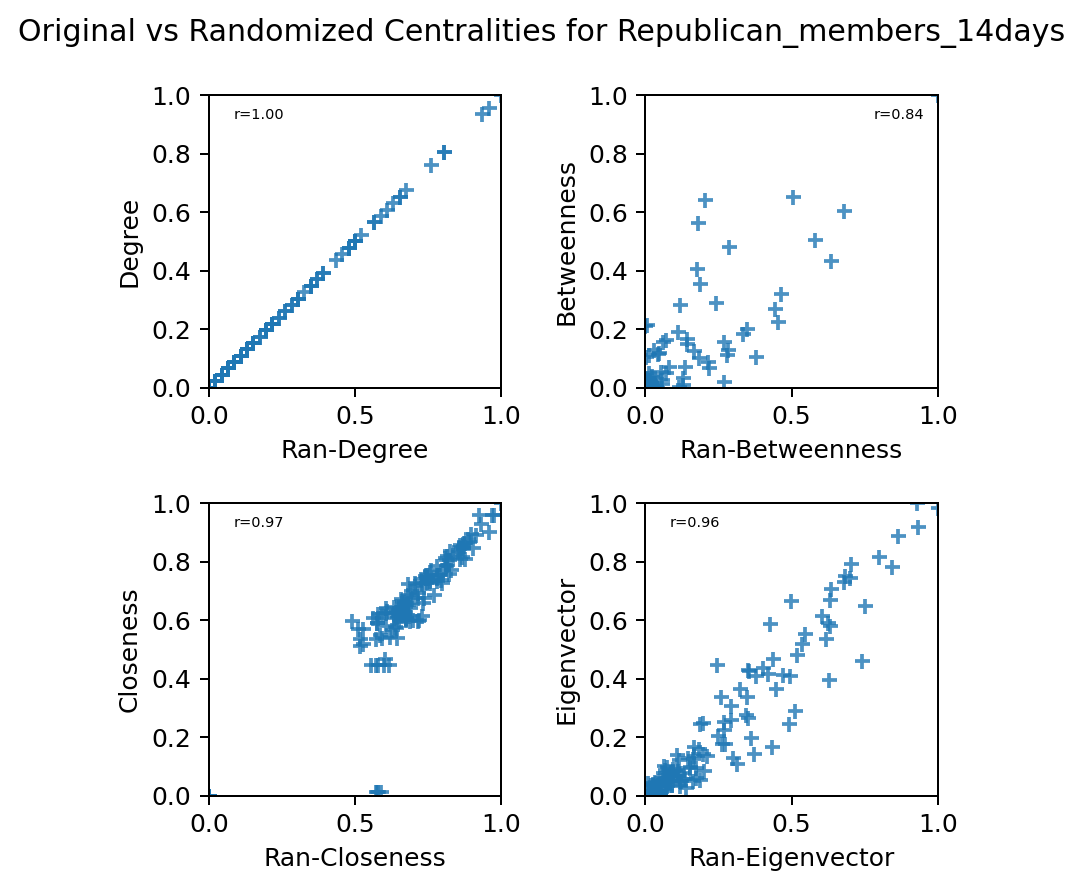

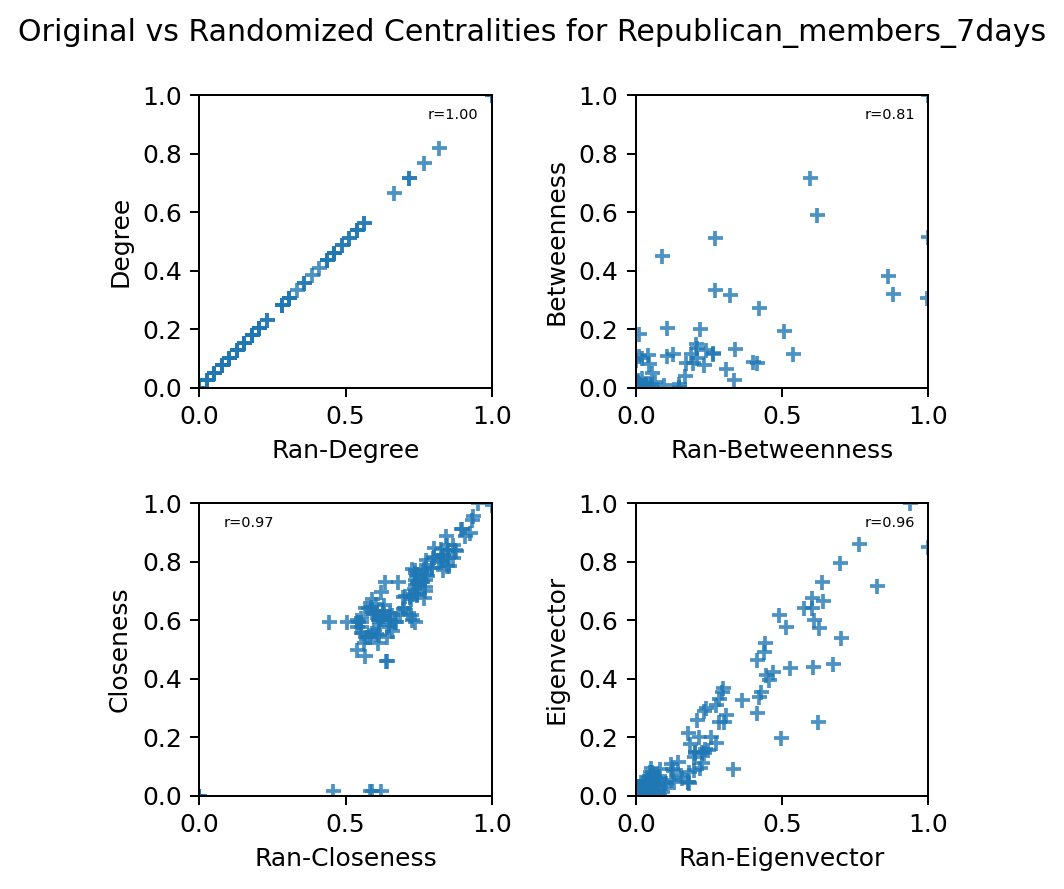

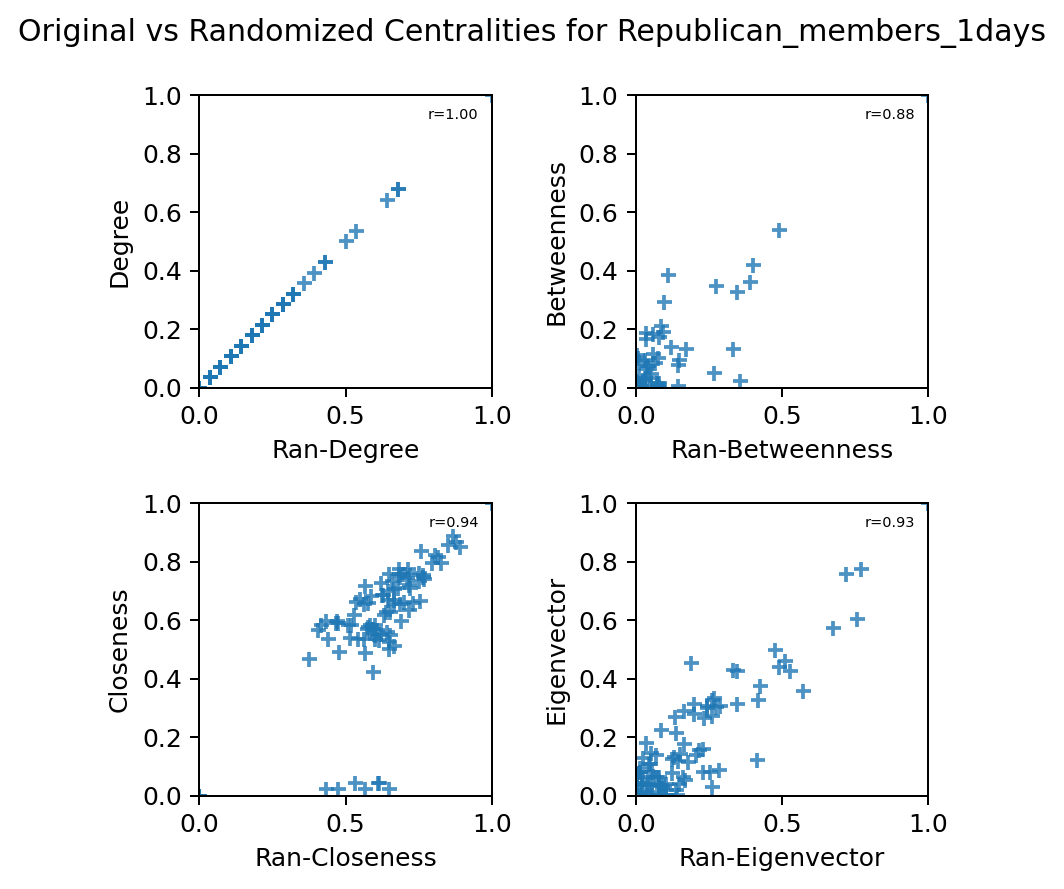

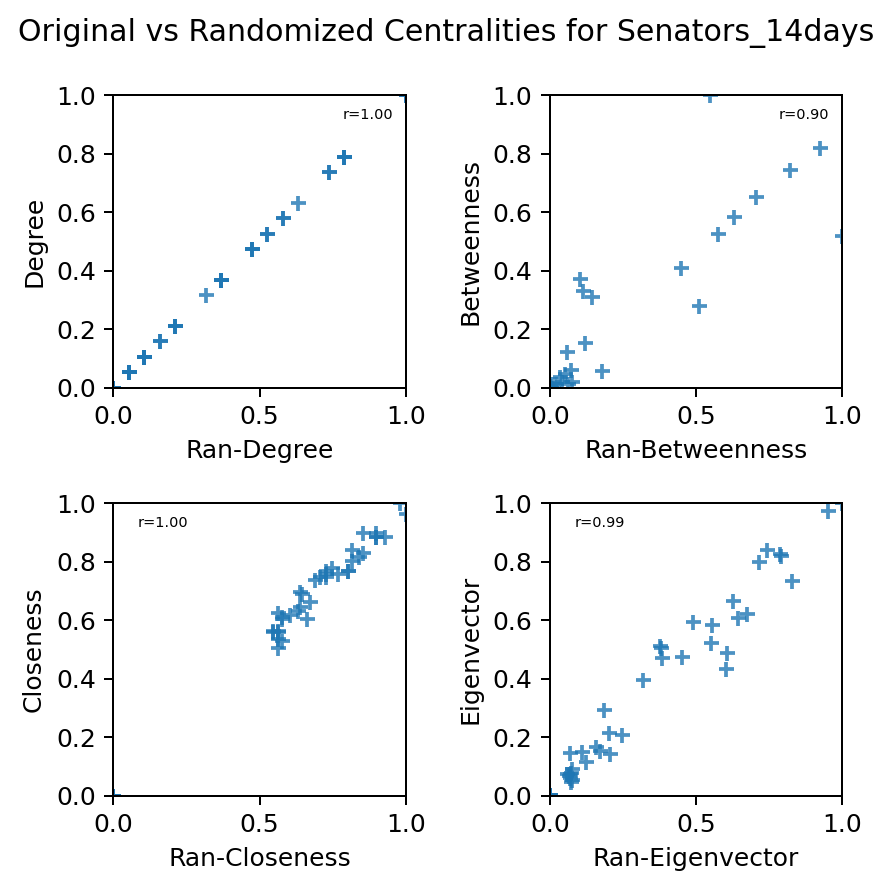

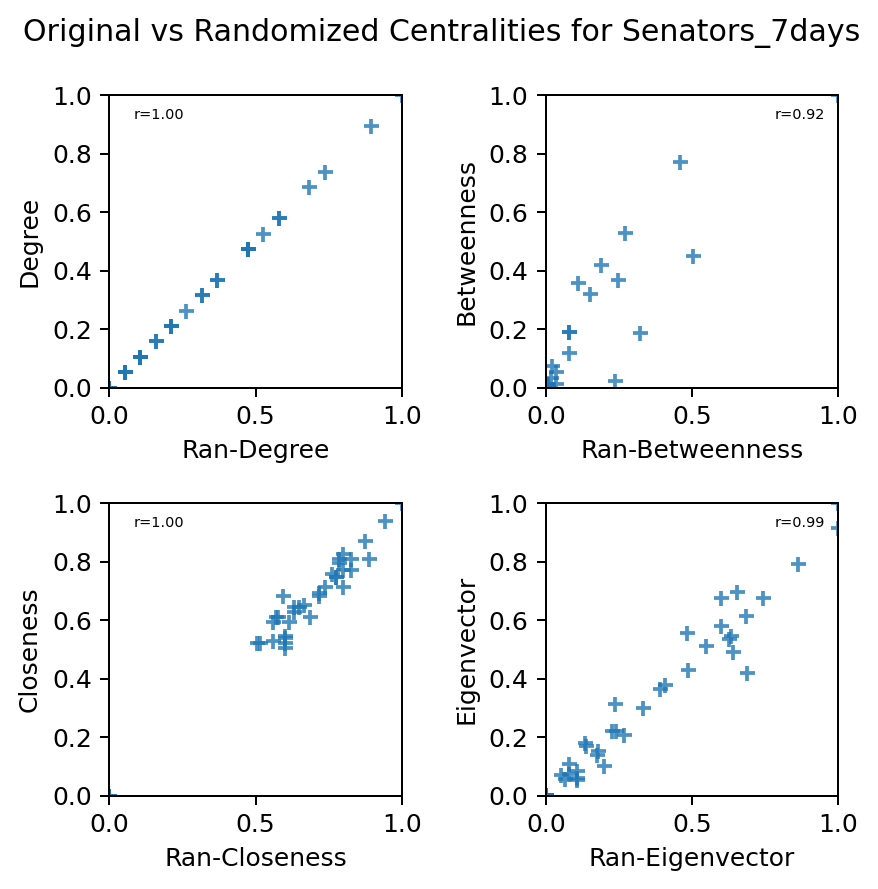

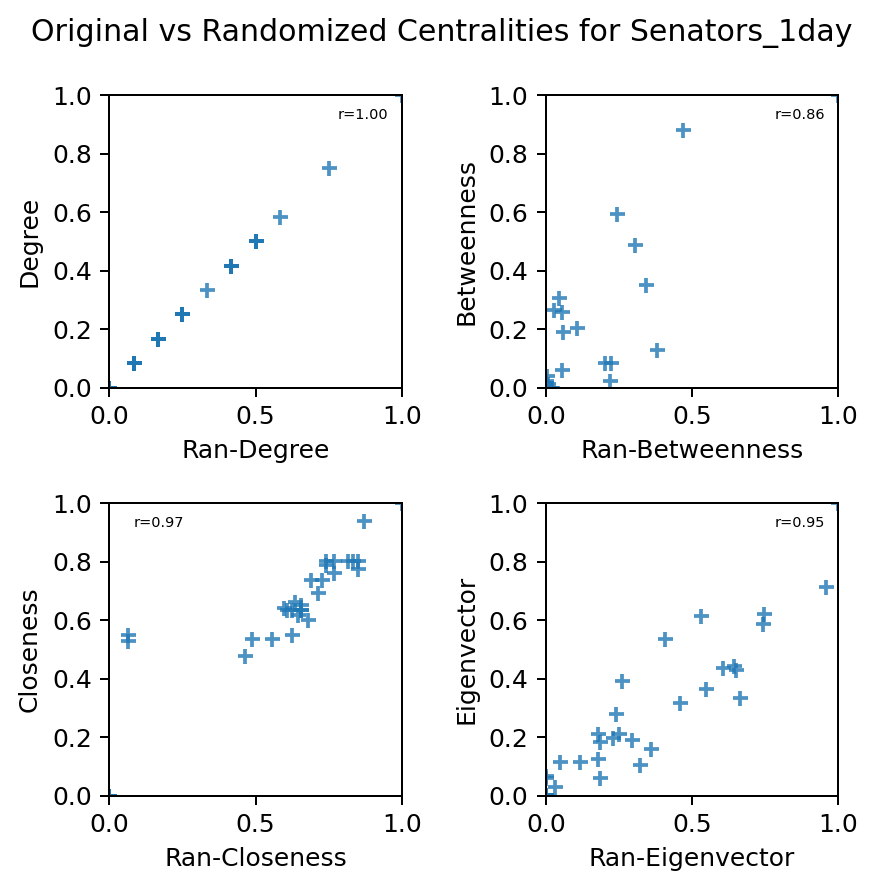

In [7]:
# Plotting pairs for original vs randomized comparisons
randomized_pairs = [
    ('degree', 'ran_degree', 'Ran-Degree', 'Degree'),
    ('betweenness', 'ran_betweenness', 'Ran-Betweenness', 'Betweenness'),
    ('closeness', 'ran_closeness', 'Ran-Closeness', 'Closeness'),
    ('eigenvector', 'ran_eigenvector', 'Ran-Eigenvector', 'Eigenvector')
]

for dataset_file, dataset_label in datasets:
    G = nx.read_gml(dataset_file, label='id')
    Gr = nx.random_reference(G, niter=100, connectivity=False, seed=1234)
    
    # Calculate centralities for both original and randomized graphs
    degree, betwns, closen, eigenv, degree_dic, betwns_dic, closen_dic, eigenv_dic = calculate_centralities(G)
    ran_degree, ran_betwns, ran_closen, ran_eigenv, ran_degree_dic, ran_betwns_dic, ran_closen_dic, ran_eigenv_dic = calculate_centralities(Gr)
    
    # Centralities dictionary for original and randomized graphs
    centralities = {
        'degree': degree,
        'betweenness': betwns,
        'closeness': closen,
        'eigenvector': eigenv,
        'ran_degree': ran_degree,
        'ran_betweenness': ran_betwns,
        'ran_closeness': ran_closen,
        'ran_eigenvector': ran_eigenv
    }
    
    fig, axs = plt.subplots(2, 2, figsize=(5,5), dpi=180)
    fig.suptitle(f'Original vs Randomized Centralities for {dataset_label}')

    for ax, (original_key, random_key, labex, labey) in zip(axs.flatten(), randomized_pairs):
        # Get the original and randomized values
        original_values = centralities[original_key]
        random_values = centralities[random_key]
        
        # Calculate Pearson correlation
        pea = sp.stats.pearsonr(random_values, original_values)[0]
        
        ax.scatter(np.array(random_values) / np.max(random_values), 
                   np.array(original_values) / np.max(original_values), 
                   label=f"r={pea:.2f}", alpha=0.8, marker='+')
        
        ax.set_xlabel(labex)
        ax.set_ylabel(labey)
        ax.set_xlim(0,1)
        ax.set_ylim(0,1)
        ax.set_aspect('equal')

        ax.legend(loc='best', frameon=False, shadow=False, ncol=1, 
                  fontsize='xx-small', handlelength=0, markerscale=0)
        
    fig.tight_layout()
    plt.show()